# Import library & data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.__version__

'2.2.3'

In [11]:
df_sales = pd.read_csv('Sales Transaction v.4a.csv')

In [13]:
print(df_sales.dtypes)

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object


In [15]:
df_sales

TransactionNo       Date ProductNo  \
0             581482  12/9/2019     22485   
1             581475  12/9/2019     22596   
2             581475  12/9/2019     23235   
3             581475  12/9/2019     23272   
4             581475  12/9/2019     23239   
...              ...        ...       ...   
536345       C536548  12/1/2018     22168   
536346       C536548  12/1/2018     21218   
536347       C536548  12/1/2018     20957   
536348       C536548  12/1/2018     22580   
536349       C536548  12/1/2018     22767   

                                ProductName  Price  Quantity  CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12     17490.0   
1       Christmas Star Wish List Chalkboard  10.65        36     13069.0   
2                  Storage Tin Vintage Leaf  11.53        12     13069.0   
3         Tree T-Light Holder Willie Winkie  10.65        12     13069.0   
4         Set Of 4 Knick Knack Tins Poppies  11.94         6     13069.0   
...                                     ...    ...       ...         ...   
536345         Organiser Wood Antique White  18.96        -2     12472.0   
536346               Red Spotty Biscuit Tin  14.09        -3     12472.0   
536347         Porcelain Hanging Bell Small  11.74        -1     12472.0   
536348         Advent Calendar Gingham Sack  16.35        -4     12472.0   
536349           Triple Photo Frame Cornice  20.45        -2     12472.0   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
536345         Germany  
536346         Germany  
536347         Germany  
536348         Germany  
536349         Germany  

[536350 rows x 8 columns]

# Overview before cleansing

In [17]:
print("=== Ringkasan Statistik Sebelum Cleansing ===")
print(df_sales.describe(include='all'))

print("\n=== Missing & Null Sebelum Cleansing ===")
print(df_sales.isna().sum())

=== Ringkasan Statistik Sebelum Cleansing ===
       TransactionNo       Date ProductNo                         ProductName  \
count         536350     536350    536350                              536350   
unique         23204        305      3768                                3768   
top           573585  12/5/2019    85123A  Cream Hanging Heart T-Light Holder   
freq            1111       5299      2378                                2378   
mean             NaN        NaN       NaN                                 NaN   
std              NaN        NaN       NaN                                 NaN   
min              NaN        NaN       NaN                                 NaN   
25%              NaN        NaN       NaN                                 NaN   
50%              NaN        NaN       NaN                                 NaN   
75%              NaN        NaN       NaN                                 NaN   
max              NaN        NaN       NaN                      

# Data Cleansing
Eksekusi 2 code dibawah ini

In [19]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

In [21]:
print(df_sales.dtypes)

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
dtype: object


In [23]:
df_sales

TransactionNo       Date ProductNo  \
0             581482 2019-12-09     22485   
1             581475 2019-12-09     22596   
2             581475 2019-12-09     23235   
3             581475 2019-12-09     23272   
4             581475 2019-12-09     23239   
...              ...        ...       ...   
536320        536585 2018-12-01     37449   
536321        536590 2018-12-01     22776   
536322        536590 2018-12-01     22622   
536323        536591 2018-12-01     37449   
536324        536597 2018-12-01     22220   

                                ProductName  Price  Quantity  CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12     17490.0   
1       Christmas Star Wish List Chalkboard  10.65        36     13069.0   
2                  Storage Tin Vintage Leaf  11.53        12     13069.0   
3         Tree T-Light Holder Willie Winkie  10.65        12     13069.0   
4         Set Of 4 Knick Knack Tins Poppies  11.94         6     13069.0   
...                                     ...    ...       ...         ...   
536320   Ceramic Cake Stand + Hanging Cakes  20.45         2     17460.0   
536321         Sweetheart 3 Tier Cake Stand  20.45         1     13065.0   
536322       Box Of Vintage Alphabet Blocks  20.45         2     13065.0   
536323   Ceramic Cake Stand + Hanging Cakes  20.45         1     14606.0   
536324     Cake Stand Lovebird 2 Tier White  20.45         1     18011.0   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
536320  United Kingdom  
536321  United Kingdom  
536322  United Kingdom  
536323  United Kingdom  
536324  United Kingdom  

[527765 rows x 8 columns]

# Data Preprocessing

In [25]:
# Mengecek missing values
missing_values = df_sales.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
CustomerNo    1
dtype: int64


In [27]:
# Menangani missing values
# Menghapus baris yang memiliki missing value pada kolom CustomerNo

df_sales = df_sales.dropna(subset=['CustomerNo'])

In [29]:
# Mengecek ulang apakah masih ada missing value
missing_values_after = df_sales.isnull().sum()
print("\nMissing Values per Column (Setelah Penanganan):")
print(missing_values_after[missing_values_after > 0])

# Mengecek tipe data setelah perubahan
print("\nTipe Data Setelah Perubahan:")
print(df_sales.dtypes)


Missing Values per Column (Setelah Penanganan):
Series([], dtype: int64)

Tipe Data Setelah Perubahan:
TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
dtype: object


In [31]:
print("=== Ringkasan Statistik Setelah Cleansing ===")
print(df_sales.describe(include='all'))

print("\n=== Missing & Null Setelah Cleansing ===")
print(df_sales.isna().sum())

=== Ringkasan Statistik Setelah Cleansing ===
       TransactionNo                           Date ProductNo  \
count         527764                         527764    527764   
unique         19789                            NaN      3753   
top           573585                            NaN    85123A   
freq            1111                            NaN      2336   
mean             NaN  2019-07-04 05:58:58.445213952       NaN   
min              NaN            2018-12-01 00:00:00       NaN   
25%              NaN            2019-03-28 00:00:00       NaN   
50%              NaN            2019-07-20 00:00:00       NaN   
75%              NaN            2019-10-19 00:00:00       NaN   
max              NaN            2019-12-09 00:00:00       NaN   
std              NaN                            NaN       NaN   

                               ProductName          Price       Quantity  \
count                               527764  527764.000000  527764.000000   
unique               

# Top Contributing products

Pada retail store, ada banyak jenis barang yang dijual.
Memahami karakteristik penjualan di setiap barang sangatlah penting.  
Barang-barang dengan minat tinggi dari customer menjadi kunci bisnis untuk meraih untung.
Barang-barang dengan minat rendah dari masyarakat akan menjadi beban dari usaha apabila bisnis menyetok terlalu banyak.

Salah satu metode segmentasi yang digunakan adalah menggunakan segmentasi berdasarkan :
- Volume transaksi : Berapa banyak transaksi yang melibatkan suatu produk (Tidak mempedulikan banyaknya barang dalam 1 transaksi)
- Revenue total : Berapa dolar revenue yang dihasilkan dari penjualan produk ini.

Buatlah segmentasi produk berdasarkan volume dan revenue total dengan aturan sebagai berikut :

1. total_revenue didefinisikan sebagai perkalian harga barang dengan banyaknya pembelian
2. 20% produk dengan volume transaksi transaksi tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
3. 20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kategori "Low"
4. Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang disebutkan masuk ke kategori "Normal"

## Pertanyaan
1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?
2. Apakah barang yang populer di November 2019 sama dengan barang yang populer di 
3. Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ?

## Membuat Dataset Product Summary

In [33]:
print(df_sales.columns)

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')


In [35]:
# Menghitung total revenue per produk
df_sales = df_sales.copy()
df_sales['TotalRevenue'] = df_sales['Price'] * df_sales['Quantity']

# Menghitung volume transaksi per produk
transaction_volume = df_sales.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
transaction_volume.columns = ['ProductNo', 'TransactionVolume']

# Mengurutkan produk berdasarkan volume transaksi dari terbesar ke terkecil
transaction_volume = transaction_volume.sort_values(by='TransactionVolume', ascending=False)

# Menghitung total revenue per produk
total_revenue = df_sales.groupby('ProductNo')['TotalRevenue'].sum().reset_index()
total_revenue.columns = ['ProductNo', 'TotalRevenue']

# Menggabungkan hasil transaction_volume dan total_revenue
product_summary = pd.merge(transaction_volume, total_revenue, on='ProductNo')

# Menampilkan hasil
print(product_summary.head())

  ProductNo  TransactionVolume  TotalRevenue
0    85123A               2269     484592.69
1    85099B               2092     297205.04
2     22423               1989     307483.85
3     47566               1687     286596.09
4     20725               1567     118894.06


In [37]:
print(df_sales.columns)

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country', 'TotalRevenue'],
      dtype='object')


## Product Segmentation Based on Transaction Volume

In [39]:
# Menentukan batas-batas segmentasi berdasarkan volume transaksi
volume_threshold_popular = transaction_volume['TransactionVolume'].quantile(0.8)
volume_threshold_low = transaction_volume['TransactionVolume'].quantile(0.2)

# Menetapkan kategori berdasarkan volume transaksi
def categorize_volume(volume):
    if volume >= volume_threshold_popular:
        return 'Popular'
    elif volume <= volume_threshold_low:
        return 'Low'
    else:
        return 'Normal'

# Menambahkan kolom 'VolumeCategory' ke product_summary
product_summary['VolumeCategory'] = product_summary['TransactionVolume'].apply(categorize_volume)

## Product Segmentation Based on Total Revenue

In [41]:
# Menentukan batas-batas segmentasi berdasarkan total revenue
revenue_threshold_popular = product_summary['TotalRevenue'].quantile(0.8)
revenue_threshold_low = product_summary['TotalRevenue'].quantile(0.2)

# Menetapkan kategori berdasarkan total revenue
def categorize_revenue(revenue):
    if revenue >= revenue_threshold_popular:
        return 'Popular'
    elif revenue <= revenue_threshold_low:
        return 'Low'
    else:
        return 'Normal'

# Menambahkan kolom 'RevenueCategory' ke product_summary
product_summary['RevenueCategory'] = product_summary['TotalRevenue'].apply(categorize_revenue)

# Menampilkan hasil
print(product_summary.head())

  ProductNo  TransactionVolume  TotalRevenue VolumeCategory RevenueCategory
0    85123A               2269     484592.69        Popular         Popular
1    85099B               2092     297205.04        Popular         Popular
2     22423               1989     307483.85        Popular         Popular
3     47566               1687     286596.09        Popular         Popular
4     20725               1567     118894.06        Popular         Popular


In [43]:
# Menampilkan hasil segmentasi
print(product_summary.head())

  ProductNo  TransactionVolume  TotalRevenue VolumeCategory RevenueCategory
0    85123A               2269     484592.69        Popular         Popular
1    85099B               2092     297205.04        Popular         Popular
2     22423               1989     307483.85        Popular         Popular
3     47566               1687     286596.09        Popular         Popular
4     20725               1567     118894.06        Popular         Popular


## Final Category Based on Kombinasi VolumeCategory dan RevenueCategory

In [45]:
def categorize_final(volume_category, revenue_category):
    if volume_category == 'Popular' and revenue_category == 'Popular':
        return 'Super Popular'
    elif (volume_category == 'Popular' and revenue_category == 'Normal') or (volume_category == 'Normal' and revenue_category == 'Popular'):
        return 'Popular'
    elif volume_category == 'Low' and revenue_category == 'Low':
        return 'Low'
    else:
        return 'Normal'

# Menambahkan kolom 'FinalCategory' ke product_summary
product_summary['FinalCategory'] = product_summary.apply(
    lambda row: categorize_final(row['VolumeCategory'], row['RevenueCategory']), axis=1
)

# Menampilkan hasil segmentasi final
print(product_summary.head())

  ProductNo  TransactionVolume  TotalRevenue VolumeCategory RevenueCategory  \
0    85123A               2269     484592.69        Popular         Popular   
1    85099B               2092     297205.04        Popular         Popular   
2     22423               1989     307483.85        Popular         Popular   
3     47566               1687     286596.09        Popular         Popular   
4     20725               1567     118894.06        Popular         Popular   

   FinalCategory  
0  Super Popular  
1  Super Popular  
2  Super Popular  
3  Super Popular  
4  Super Popular  


## Analisa November 2019

     ProductNo                  ProductName VolumeCategory RevenueCategory  \
0        10080     Groovy Cactus Inflatable         Normal          Normal   
1        10120                 Doggy Rubber         Normal          Normal   
2       10124A  Spots On Red Bookcover Tape            Low             Low   
3       10124G     Army Camo Bookcover Tape            Low             Low   
4        10125      Mini Funky Design Tapes            Low          Normal   
...        ...                          ...            ...             ...   
2864    90214K    Letter "K" Bling Key Ring            Low             Low   
2865    90214M    Letter "M" Bling Key Ring            Low             Low   
2866    90214N    Letter "N" Bling Key Ring            Low             Low   
2867    90214S    Letter "S" Bling Key Ring            Low          Normal   
2868    90214V    Letter "V" Bling Key Ring            Low             Low   

     FinalCategory  
0           Normal  
1           Normal  


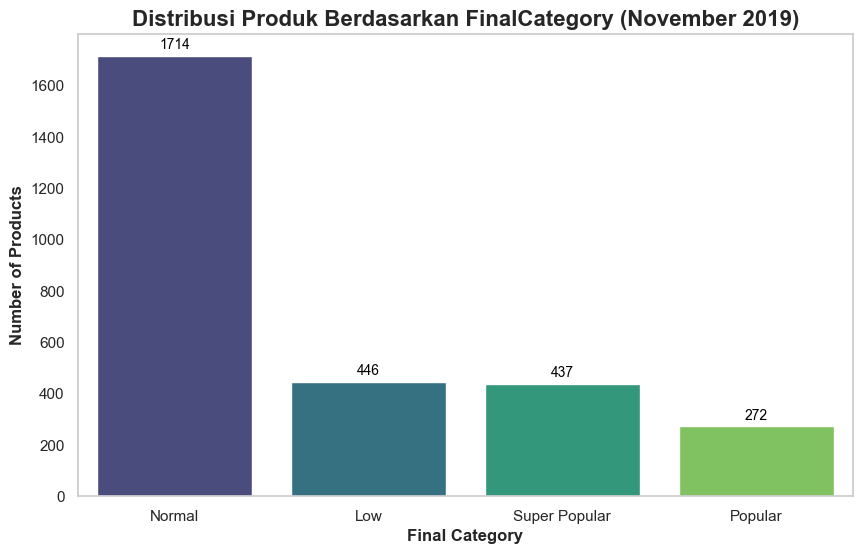

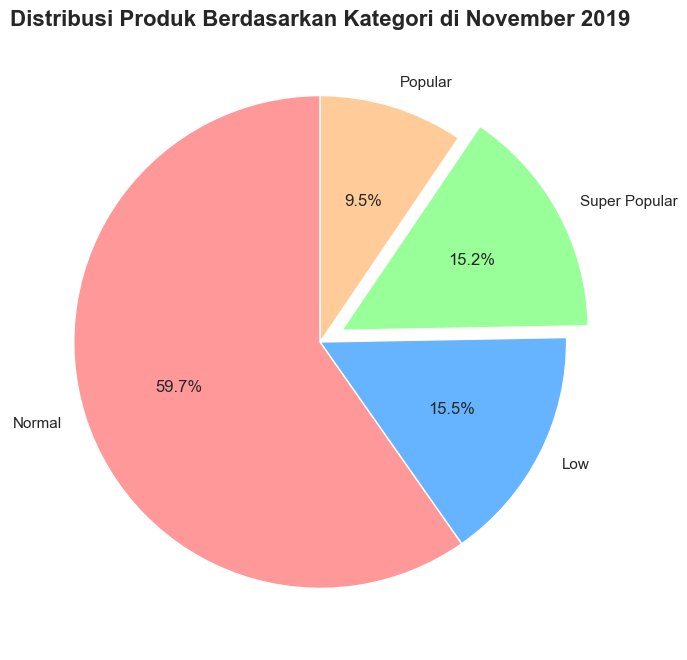

In [47]:
# Filter data untuk bulan November 2019
november_data = df_sales[df_sales['Date'].dt.month == 11]
november_data = november_data[november_data['Date'].dt.year == 2019]

# Menghitung transaksi dan total revenue per produk untuk bulan November 2019
november_summary = november_data.groupby(['ProductNo', 'ProductName']).agg({
    'TransactionNo': 'nunique',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Menghitung total revenue
november_summary['TotalRevenue'] = november_summary['Price'] * november_summary['Quantity']

# Melakukan segmentasi berdasarkan volume transaksi
november_summary['TransactionVolumeRank'] = november_summary['TransactionNo'].rank(method='first', ascending=False)
november_summary['VolumeCategory'] = pd.cut(november_summary['TransactionVolumeRank'],
                                            bins=[0, len(november_summary)*0.2, len(november_summary)*0.8, len(november_summary)],
                                            labels=['Popular', 'Normal', 'Low'])

# Melakukan segmentasi berdasarkan total revenue
november_summary['RevenueRank'] = november_summary['TotalRevenue'].rank(method='first', ascending=False)
november_summary['RevenueCategory'] = pd.cut(november_summary['RevenueRank'],
                                             bins=[0, len(november_summary)*0.2, len(november_summary)*0.8, len(november_summary)],
                                             labels=['Popular', 'Normal', 'Low'])

# Menetapkan kategori final berdasarkan kombinasi VolumeCategory dan RevenueCategory
november_summary['FinalCategory'] = november_summary.apply(
    lambda row: categorize_final(row['VolumeCategory'], row['RevenueCategory']), axis=1
)

# Menampilkan hasil keseluruhan
print(november_summary[['ProductNo', 'ProductName', 'VolumeCategory', 'RevenueCategory', 'FinalCategory']])

# Menyaring produk yang masuk kategori Super Popular
super_popular_november = november_summary[november_summary['FinalCategory'] == 'Super Popular']

# Menampilkan hasil
print(super_popular_november[['ProductNo', 'ProductName', 'FinalCategory']])

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Menghitung jumlah produk di setiap kategori
category_counts = november_summary['FinalCategory'].value_counts().reset_index()
category_counts.columns = ['FinalCategory', 'Count']

# === Visualisasi Bar Chart ===
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='FinalCategory', 
    y='Count', 
    hue='FinalCategory', 
    data=category_counts, 
    palette='viridis'
)
ax.grid(False)
plt.title('Distribusi Produk Berdasarkan FinalCategory (November 2019)', fontsize=16, fontweight="bold")
plt.xlabel('Final Category', fontsize=12, fontweight="bold")
plt.ylabel('Number of Products', fontsize=12, fontweight="bold")

# Menampilkan angka di setiap bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 8), 
        textcoords = 'offset points',
        fontsize=10,
        color='black'
    )

plt.show()

# Menghitung proporsi produk berdasarkan kategori final
category_counts = november_summary['FinalCategory'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'], startangle=90, explode=[0.1 if i == 'Super Popular' else 0 for i in category_counts.index])
plt.title('Distribusi Produk Berdasarkan Kategori di November 2019', fontsize=16, fontweight="bold")
plt.show()

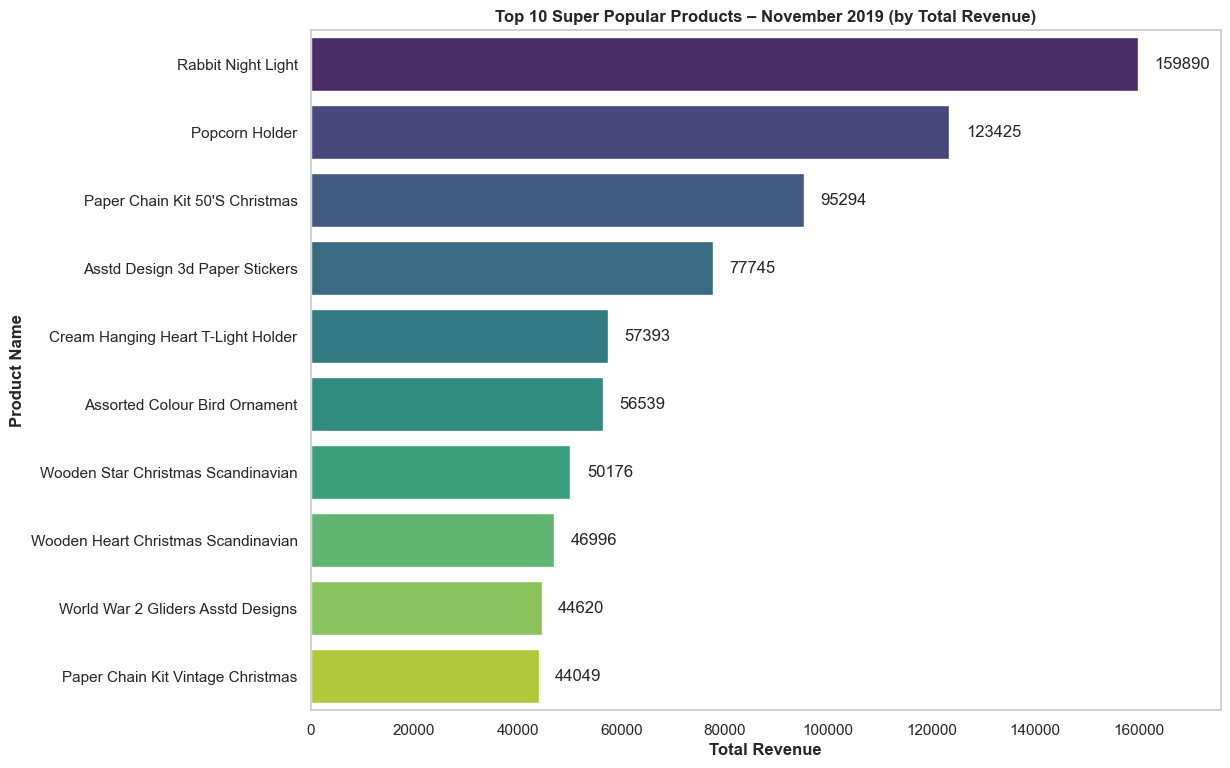

In [49]:
# Filter data Bulan November 2019
november_data = df_sales[df_sales['Date'].dt.to_period('M') == '2019-11']

# Hitung total revenue per produk di November
top10_nov_revenue = (
    november_data
    .groupby('ProductName')['TotalRevenue']
    .sum()
    .reset_index()
    .sort_values('TotalRevenue', ascending=False)
    .head(10)
)

# Plot Bar Chart Top 10
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top10_nov_revenue,
    x='TotalRevenue',
    y='ProductName',
    hue="ProductName",
    legend=False,
    palette="viridis"
)
ax.grid(False)
plt.title('Top 10 Super Popular Products – November 2019 (by Total Revenue)', fontweight="bold")
plt.xlabel('Total Revenue', fontweight="bold")
plt.ylabel('Product Name', fontweight="bold")

# Cari nilai maksimum untuk menentukan offset teks
max_quantity = top10_nov_revenue['TotalRevenue'].max()

# Tambahkan angka di setiap bar dengan penyesuaian posisi
for p in ax.patches:
    width = p.get_width()
    yloc = p.get_y() + p.get_height()/2
    # Gunakan offset yang proporsional dengan nilai maksimum
    offset = max_quantity * 0.02  # 2% dari nilai maksimum
    ax.text(
        width + offset,  # Posisi x: lebar bar + offset
        yloc,
        f"{width:.0f}",
        va='center',
        ha='left'  # Penyelarasan horizontal ke kiri
    )

# Atur margin dan batas plot
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)
ax.set_xlim(right=max_quantity * 1.1)  # Tambahkan 10% ruang ekstra di sebelah kanan

plt.show()

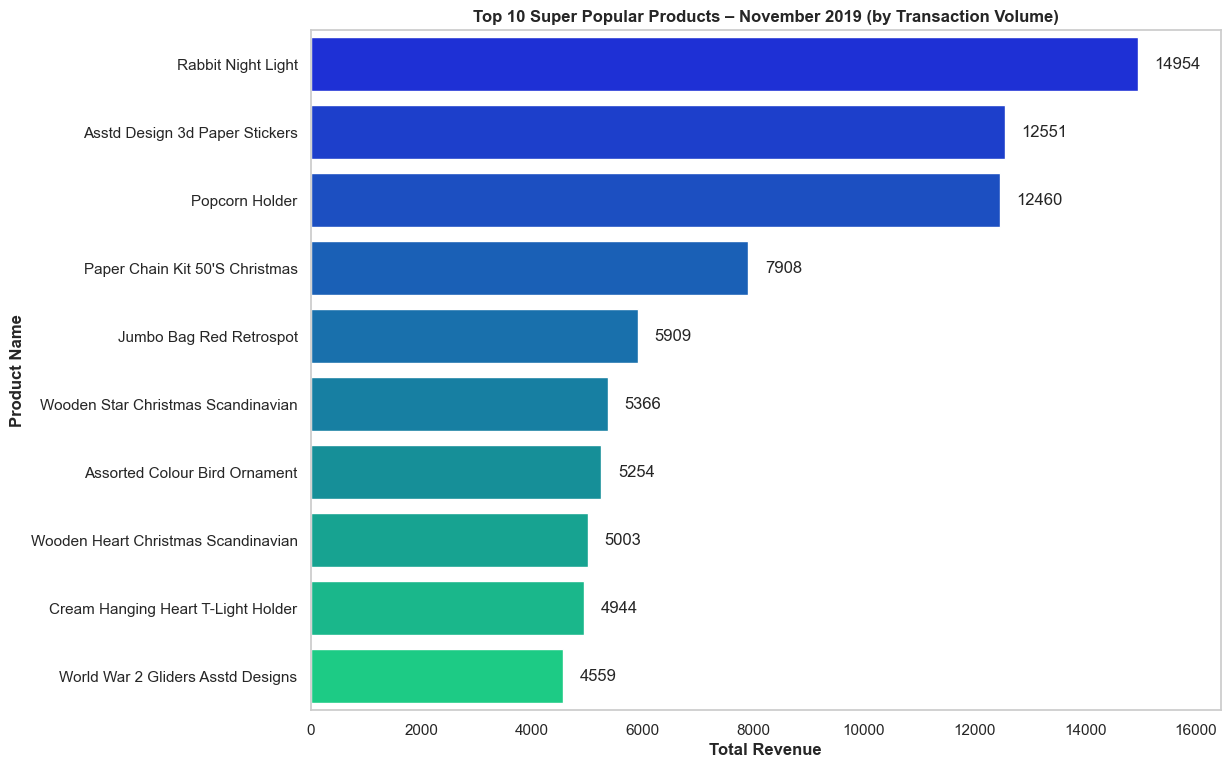

In [51]:
# Filter data Bulan November 2019
november_data = df_sales[df_sales['Date'].dt.to_period('M') == '2019-11']

# Hitung total revenue per produk di November
top10_nov_revenue = (
    november_data
    .groupby('ProductName')['Quantity']
    .sum()
    .reset_index()
    .sort_values('Quantity', ascending=False)
    .head(10)
)

# Plot Bar Chart Top 10
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top10_nov_revenue,
    x='Quantity',
    y='ProductName',
    hue="ProductName",
    legend=False,
    palette="winter"
)
ax.grid(False)
plt.title('Top 10 Super Popular Products – November 2019 (by Transaction Volume)', fontweight="bold")
plt.xlabel('Total Revenue', fontweight="bold")
plt.ylabel('Product Name', fontweight="bold")

# Cari nilai maksimum untuk menentukan offset teks
max_quantity = top10_nov_revenue['Quantity'].max()

# Tambahkan angka di setiap bar dengan penyesuaian posisi
for p in ax.patches:
    width = p.get_width()
    yloc = p.get_y() + p.get_height()/2
    # Gunakan offset yang proporsional dengan nilai maksimum
    offset = max_quantity * 0.02  # 2% dari nilai maksimum
    ax.text(
        width + offset,  # Posisi x: lebar bar + offset
        yloc,
        f"{width:.0f}",
        va='center',
        ha='left'  # Penyelarasan horizontal ke kiri
    )

# Atur margin dan batas plot
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)
ax.set_xlim(right=max_quantity * 1.1)  # Tambahkan 10% ruang ekstra di sebelah kanan

plt.show()

## Analisa July 2019

     ProductNo                   ProductName VolumeCategory RevenueCategory  \
0        10080      Groovy Cactus Inflatable         Normal          Normal   
1        10120                  Doggy Rubber            Low             Low   
2        10125       Mini Funky Design Tapes         Normal          Normal   
3        10133  Colouring Pencils Brown Tube        Popular         Popular   
4        11001   Asstd Design Racing Car Pen        Popular         Popular   
...        ...                           ...            ...             ...   
2608    90214R     Letter "R" Bling Key Ring         Normal             Low   
2609    90214S     Letter "S" Bling Key Ring         Normal             Low   
2610    90214V     Letter "V" Bling Key Ring            Low             Low   
2611    90214W     Letter "W" Bling Key Ring            Low             Low   
2612    90214Z     Letter "Z" Bling Key Ring            Low             Low   

      FinalCategory  
0            Normal  
1      

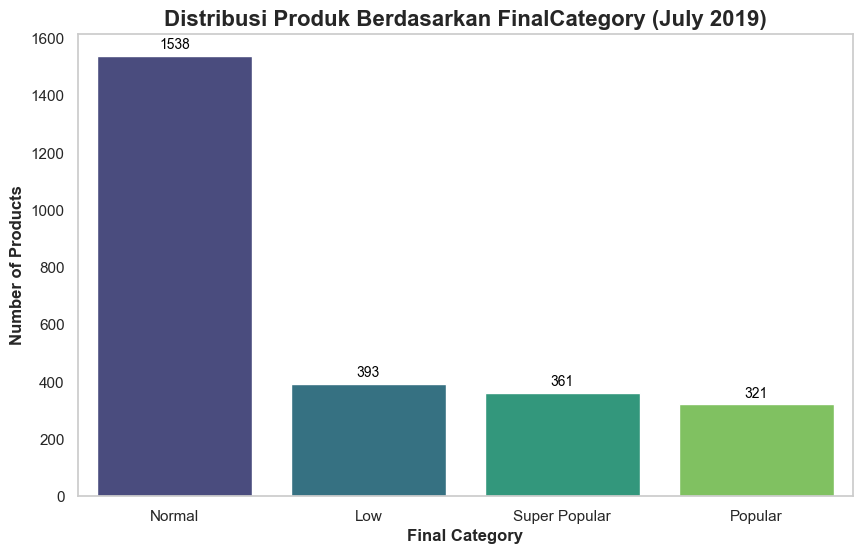

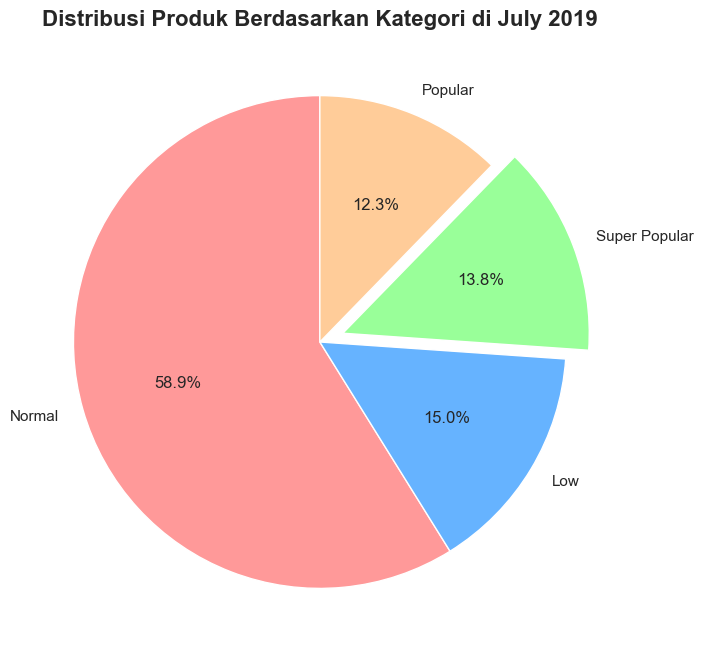

In [53]:
# Filter data untuk bulan July 2019
july_data = df_sales[df_sales['Date'].dt.month == 7]
july_data = july_data[july_data['Date'].dt.year == 2019]

# Menghitung transaksi dan total revenue per produk untuk bulan July 2019
july_summary = july_data.groupby(['ProductNo', 'ProductName']).agg({
    'TransactionNo': 'nunique',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Menghitung total revenue
july_summary['TotalRevenue'] = july_summary['Price'] * july_summary['Quantity']

# Melakukan segmentasi berdasarkan volume transaksi
july_summary['TransactionVolumeRank'] = july_summary['TransactionNo'].rank(method='first', ascending=False)
july_summary['VolumeCategory'] = pd.cut(july_summary['TransactionVolumeRank'],
                                            bins=[0, len(july_summary)*0.2, len(july_summary)*0.8, len(july_summary)],
                                            labels=['Popular', 'Normal', 'Low'])

# Melakukan segmentasi berdasarkan total revenue
july_summary['RevenueRank'] = july_summary['TotalRevenue'].rank(method='first', ascending=False)
july_summary['RevenueCategory'] = pd.cut(july_summary['RevenueRank'],
                                             bins=[0, len(july_summary)*0.2, len(july_summary)*0.8, len(july_summary)],
                                             labels=['Popular', 'Normal', 'Low'])

# Menetapkan kategori final berdasarkan kombinasi VolumeCategory dan RevenueCategory
july_summary['FinalCategory'] = july_summary.apply(
    lambda row: categorize_final(row['VolumeCategory'], row['RevenueCategory']), axis=1
)

# Menampilkan hasil keseluruhan
print(july_summary[['ProductNo', 'ProductName', 'VolumeCategory', 'RevenueCategory', 'FinalCategory']])

# Menyaring produk yang masuk kategori Super Popular
super_popular_july = july_summary[july_summary['FinalCategory'] == 'Super Popular']

# Menampilkan hasil
print(super_popular_july[['ProductNo', 'ProductName', 'FinalCategory']])

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Menghitung jumlah produk di setiap kategori
category_counts = july_summary['FinalCategory'].value_counts().reset_index()
category_counts.columns = ['FinalCategory', 'Count']

# === Visualisasi Bar Chart ===
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='FinalCategory', 
    y='Count', 
    hue='FinalCategory', 
    data=category_counts, 
    palette='viridis'
)
ax.grid(False)
plt.title('Distribusi Produk Berdasarkan FinalCategory (July 2019)', fontsize=16, fontweight="bold")
plt.xlabel('Final Category', fontsize=12, fontweight="bold")
plt.ylabel('Number of Products', fontsize=12, fontweight="bold")

# Menampilkan angka di setiap bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 8), 
        textcoords = 'offset points',
        fontsize=10,
        color='black'
    )

plt.show()

# Menghitung proporsi produk berdasarkan kategori final
category_counts = july_summary['FinalCategory'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'], startangle=90, explode=[0.1 if i == 'Super Popular' else 0 for i in category_counts.index])
plt.title('Distribusi Produk Berdasarkan Kategori di July 2019', fontsize=16, fontweight="bold")
plt.show()

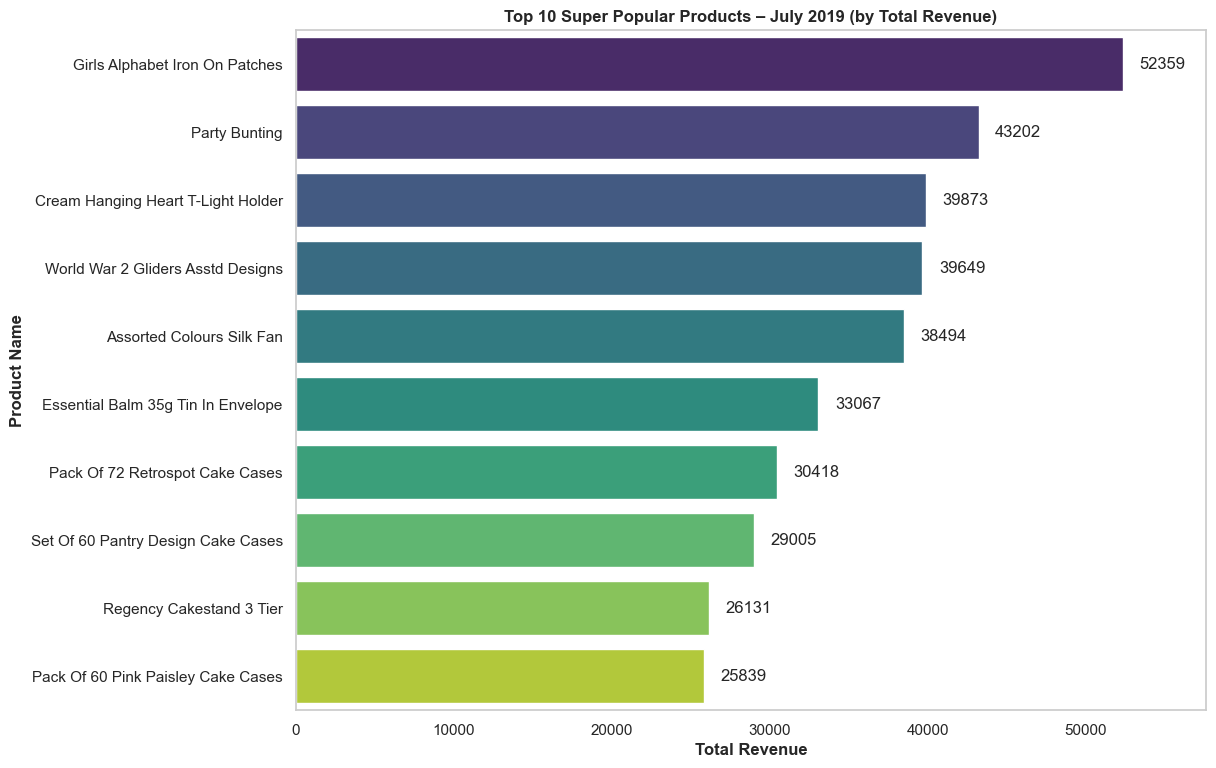

In [55]:
# Filter data Bulan July 2019
july_data = df_sales[df_sales['Date'].dt.to_period('M') == '2019-07']

# Hitung total revenue per produk di July
top10_jul_revenue = (
    july_data
    .groupby('ProductName')['TotalRevenue']
    .sum()
    .reset_index()
    .sort_values('TotalRevenue', ascending=False)
    .head(10)
)

# Plot Bar Chart Top 10
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top10_jul_revenue,
    x='TotalRevenue',
    y='ProductName',
    hue="ProductName",
    legend=False,
    palette="viridis"
)
ax.grid(False)
plt.title('Top 10 Super Popular Products – July 2019 (by Total Revenue)', fontweight="bold")
plt.xlabel('Total Revenue', fontweight="bold")
plt.ylabel('Product Name', fontweight="bold")

# Cari nilai maksimum untuk menentukan offset teks
max_quantity = top10_jul_revenue['TotalRevenue'].max()

# Tambahkan angka di setiap bar dengan penyesuaian posisi
for p in ax.patches:
    width = p.get_width()
    yloc = p.get_y() + p.get_height()/2
    # Gunakan offset yang proporsional dengan nilai maksimum
    offset = max_quantity * 0.02  # 2% dari nilai maksimum
    ax.text(
        width + offset,  # Posisi x: lebar bar + offset
        yloc,
        f"{width:.0f}",
        va='center',
        ha='left'  # Penyelarasan horizontal ke kiri
    )

# Atur margin dan batas plot
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)
ax.set_xlim(right=max_quantity * 1.1)  # Tambahkan 10% ruang ekstra di sebelah kanan

plt.show()

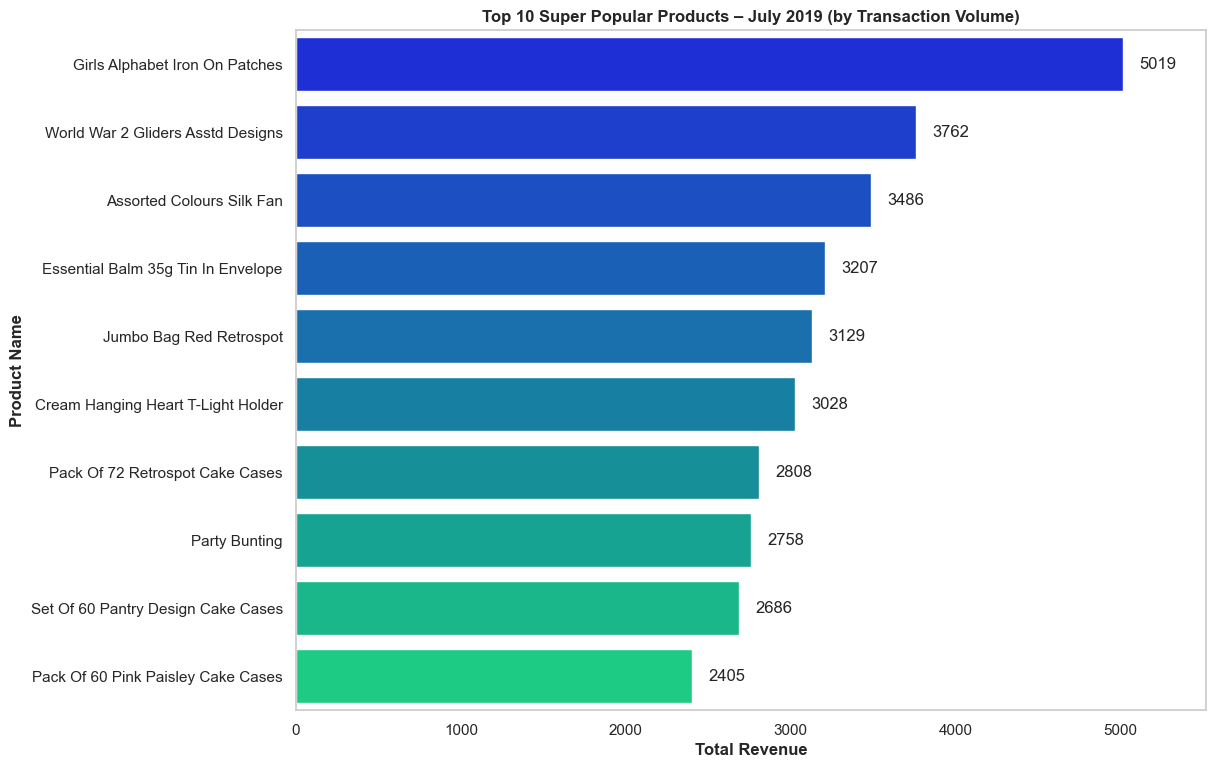

In [57]:
# Filter data Bulan July 2019
july_data = df_sales[df_sales['Date'].dt.to_period('M') == '2019-07']

# Hitung total revenue per produk di November
top10_jul_revenue = (
    july_data
    .groupby('ProductName')['Quantity']
    .sum()
    .reset_index()
    .sort_values('Quantity', ascending=False)
    .head(10)
)

# Plot Bar Chart Top 10
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top10_jul_revenue,
    x='Quantity',
    y='ProductName',
    hue="ProductName",
    legend=False,
    palette="winter"
)
ax.grid(False)
plt.title('Top 10 Super Popular Products – July 2019 (by Transaction Volume)', fontweight="bold")
plt.xlabel('Total Revenue', fontweight="bold")
plt.ylabel('Product Name', fontweight="bold")

# Cari nilai maksimum untuk menentukan offset teks
max_quantity = top10_jul_revenue['Quantity'].max()

# Tambahkan angka di setiap bar dengan penyesuaian posisi
for p in ax.patches:
    width = p.get_width()
    yloc = p.get_y() + p.get_height()/2
    # Gunakan offset yang proporsional dengan nilai maksimum
    offset = max_quantity * 0.02  # 2% dari nilai maksimum
    ax.text(
        width + offset,  # Posisi x: lebar bar + offset
        yloc,
        f"{width:.0f}",
        va='center',
        ha='left'  # Penyelarasan horizontal ke kiri
    )

# Atur margin dan batas plot
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)
ax.set_xlim(right=max_quantity * 1.1)  # Tambahkan 10% ruang ekstra di sebelah kanan

plt.show()

## Analisa November 2019 VS July 2019

In [59]:
# Mendapatkan produk yang termasuk kategori "Super Popular" di bulan November 2019
super_popular_november = november_summary[november_summary['FinalCategory'] == 'Super Popular']

# Mendapatkan produk yang termasuk kategori "Super Popular" di bulan Juli 2019
super_popular_july = july_summary[july_summary['FinalCategory'] == 'Super Popular']

# Menghapus duplikat dari produk super populer di setiap bulan
super_popular_november_distinct = super_popular_november[['ProductNo', 'ProductName']].drop_duplicates()
super_popular_july_distinct = super_popular_july[['ProductNo', 'ProductName']].drop_duplicates()

# Membandingkan produk Super Popular di November 2019 dan Juli 2019
common_super_popular_products = pd.merge(super_popular_november_distinct,
                                         super_popular_july_distinct,
                                         on='ProductNo',
                                         how='inner')

# Menampilkan hasil
print("Produk yang masuk kategori Super Popular di November 2019 dan juga di Juli 2019:")
print(common_super_popular_products)

Produk yang masuk kategori Super Popular di November 2019 dan juga di Juli 2019:
    ProductNo                       ProductName_x  \
0       16237                Sleeping Cat Erasers   
1       20676                  Red Retrospot Bowl   
2       20685               Doormat Red Retrospot   
3       20712          Jumbo Bag Woodland Animals   
4       20713                      Jumbo Bag Owls   
..        ...                                 ...   
189    85099B             Jumbo Bag Red Retrospot   
190    85099C       Jumbo Bag Baroque Black White   
191    85099F                Jumbo Bag Strawberry   
192    85123A  Cream Hanging Heart T-Light Holder   
193     85152        Hand Over The Chocolate Sign   

                          ProductName_y  
0                  Sleeping Cat Erasers  
1                    Red Retrospot Bowl  
2                 Doormat Red Retrospot  
3            Jumbo Bag Woodland Animals  
4                        Jumbo Bag Owls  
..                            

In [61]:
# Produk yang hanya ada di November (Tidak ada di Juli)
november_only = pd.merge(super_popular_november_distinct, super_popular_july_distinct, on='ProductNo', how='left', indicator=True)
november_only = november_only[november_only['_merge'] == 'left_only'].drop('_merge', axis=1)

# Produk yang hanya ada di Juli (Tidak ada di November)
july_only = pd.merge(super_popular_july_distinct, super_popular_november_distinct, on='ProductNo', how='left', indicator=True)
july_only = july_only[july_only['_merge'] == 'left_only'].drop('_merge', axis=1)

# Menampilkan hasil
print("Produk yang Super Popular hanya di November 2019 (Tidak muncul di Juli 2019):")
print(november_only)

print("Produk yang Super Popular hanya di Juli 2019 (Tidak muncul di November 2019):")
print(july_only)

Produk yang Super Popular hanya di November 2019 (Tidak muncul di Juli 2019):
    ProductNo                        ProductName_x ProductName_y
0      16169E                  Wrap 50'S Christmas           NaN
2       20668      Disco Ball Christmas Decoration           NaN
15      20749           Assorted Colour Mini Cases           NaN
19      20973        12 Pencil Small Tube Woodland           NaN
20      20975  12 Pencils Small Tube Red Retrospot           NaN
..        ...                                  ...           ...
427    85049A        Traditional Christmas Ribbons           NaN
428    85049E            Scandinavian Reds Ribbons           NaN
429     85066          Cream Sweetheart Mini Chest           NaN
434     85150        Ladies & Gentlemen Metal Sign           NaN
436    85199S    Small Hanging Ivory/Red Wood Bird           NaN

[243 rows x 3 columns]
Produk yang Super Popular hanya di Juli 2019 (Tidak muncul di November 2019):
    ProductNo                      Produ

## Alltime analysis

     ProductNo                  ProductName VolumeCategory RevenueCategory  \
0        10002   Inflatable Political Globe         Normal          Normal   
1        10080     Groovy Cactus Inflatable         Normal          Normal   
2        10120                 Doggy Rubber         Normal          Normal   
3       10123C         Hearts Wrapping Tape            Low             Low   
4       10124A  Spots On Red Bookcover Tape            Low             Low   
...        ...                          ...            ...             ...   
3748    90214U    Letter "U" Bling Key Ring            Low             Low   
3749    90214V    Letter "V" Bling Key Ring         Normal             Low   
3750    90214W    Letter "W" Bling Key Ring            Low             Low   
3751    90214Y    Letter "Y" Bling Key Ring            Low          Normal   
3752    90214Z    Letter "Z" Bling Key Ring            Low             Low   

     FinalCategory  
0           Normal  
1           Normal  


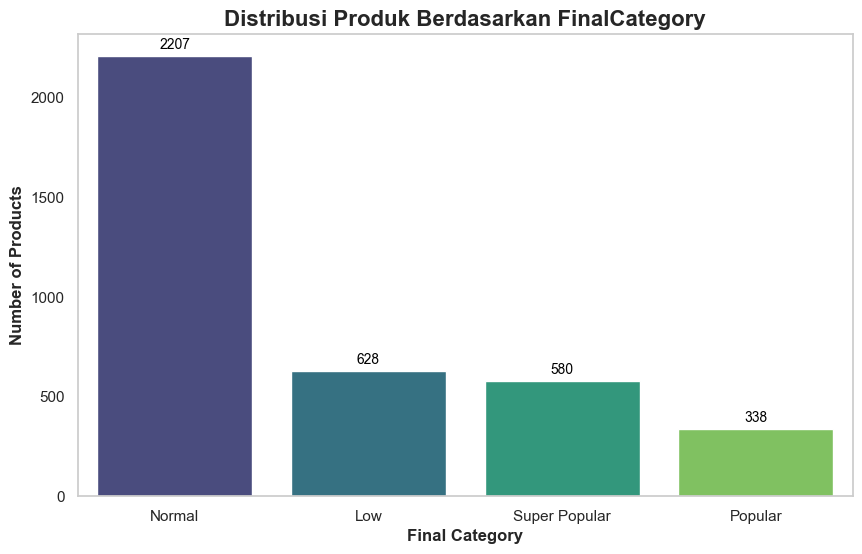

In [63]:
# Menghitung transaksi dan total revenue per produk
alltime_summary = df_sales.groupby(['ProductNo', 'ProductName']).agg({
    'TransactionNo': 'nunique',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Menghitung total revenue
alltime_summary['TotalRevenue'] = alltime_summary['Price'] * alltime_summary['Quantity']

# Melakukan segmentasi berdasarkan volume transaksi
alltime_summary['TransactionVolumeRank'] = alltime_summary['TransactionNo'].rank(method='first', ascending=False)
alltime_summary['VolumeCategory'] = pd.cut(alltime_summary['TransactionVolumeRank'],
                                            bins=[0, len(alltime_summary)*0.2, len(alltime_summary)*0.8, len(alltime_summary)],
                                            labels=['Popular', 'Normal', 'Low'])

# Melakukan segmentasi berdasarkan total revenue
alltime_summary['RevenueRank'] = alltime_summary['TotalRevenue'].rank(method='first', ascending=False)
alltime_summary['RevenueCategory'] = pd.cut(alltime_summary['RevenueRank'],
                                             bins=[0, len(alltime_summary)*0.2, len(alltime_summary)*0.8, len(alltime_summary)],
                                             labels=['Popular', 'Normal', 'Low'])

# Menetapkan kategori final berdasarkan kombinasi VolumeCategory dan RevenueCategory
alltime_summary['FinalCategory'] = alltime_summary.apply(
    lambda row: categorize_final(row['VolumeCategory'], row['RevenueCategory']), axis=1
)

# Menampilkan hasil keseluruhan
print(alltime_summary[['ProductNo', 'ProductName', 'VolumeCategory', 'RevenueCategory', 'FinalCategory']])

# Menyaring produk yang masuk kategori Super Popular
super_popular_alltime = alltime_summary[alltime_summary['FinalCategory'] == 'Super Popular']

# Menampilkan hasil
print(super_popular_alltime[['ProductNo', 'ProductName', 'FinalCategory']])

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Menghitung jumlah produk di setiap kategori
category_counts = alltime_summary['FinalCategory'].value_counts().reset_index()
category_counts.columns = ['FinalCategory', 'Count']

# === Visualisasi Bar Chart ===
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='FinalCategory', 
    y='Count', 
    hue='FinalCategory', 
    data=category_counts, 
    palette='viridis'
)
ax.grid(False)
plt.title('Distribusi Produk Berdasarkan FinalCategory', fontsize=16, fontweight="bold")
plt.xlabel('Final Category', fontsize=12, fontweight="bold")
plt.ylabel('Number of Products', fontsize=12, fontweight="bold")

# Menampilkan angka di setiap bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 8), 
        textcoords = 'offset points',
        fontsize=10,
        color='black'
    )

plt.show()

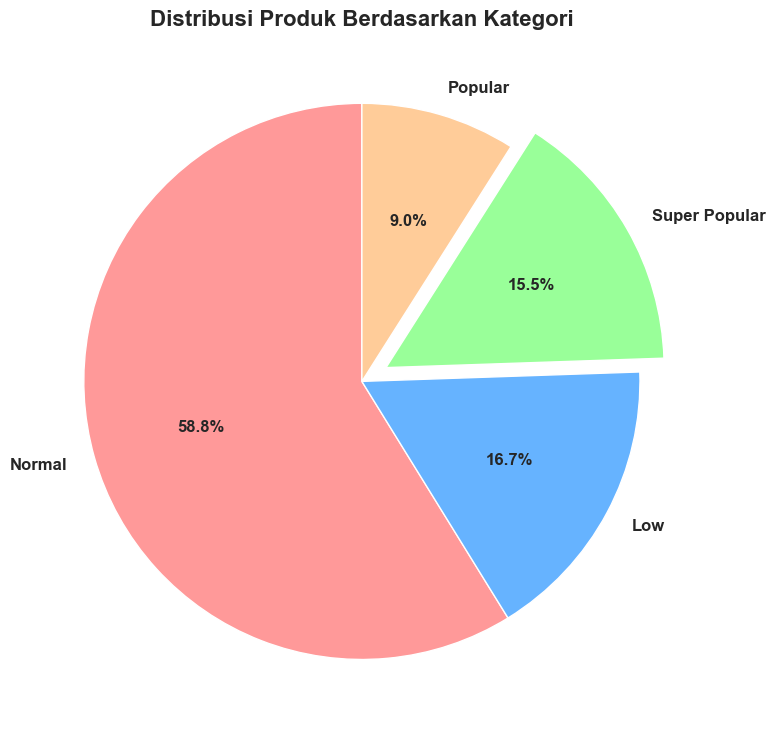

In [65]:
# Menghitung proporsi produk berdasarkan kategori final
category_counts = alltime_summary['FinalCategory'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'],
    startangle=90,
    explode=[0.1 if i == 'Super Popular' else 0 for i in category_counts.index],
    textprops={'fontweight': 'bold', 'fontsize': 12}  # Membuat teks bold dan ukuran lebih terbaca
)
plt.title('Distribusi Produk Berdasarkan Kategori', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

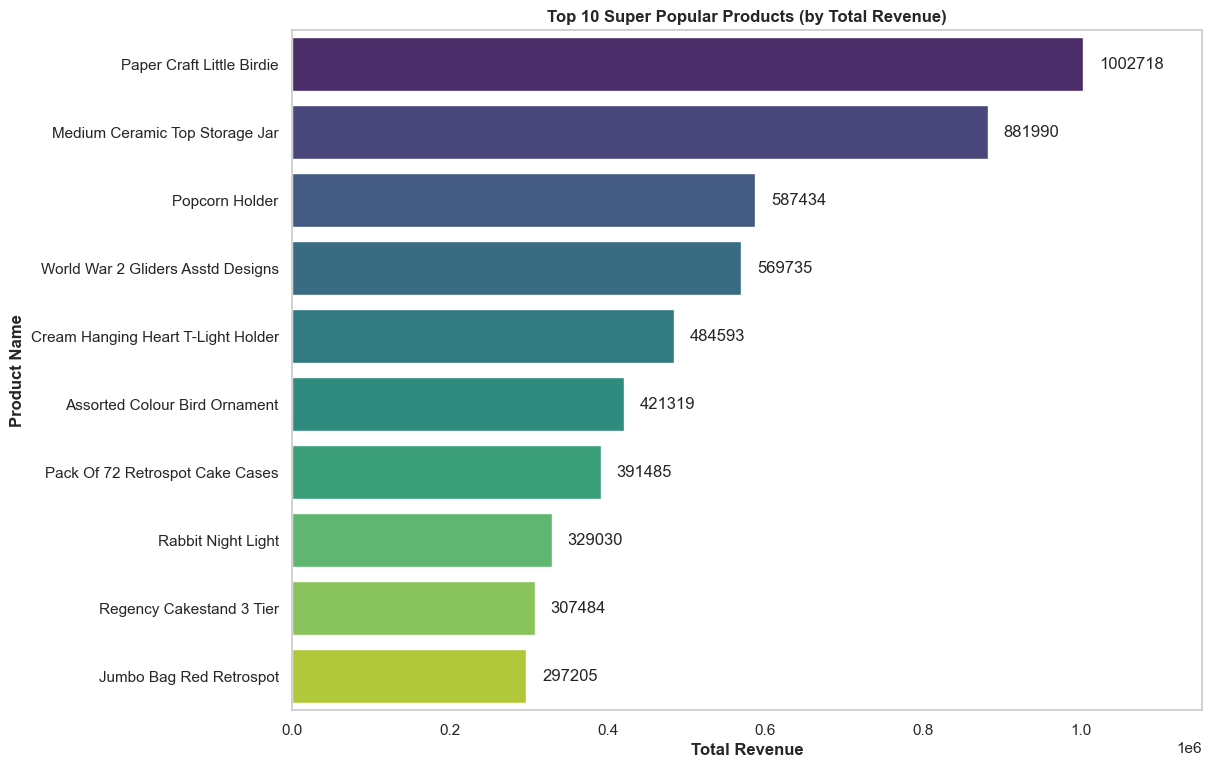

In [67]:
# Hitung total revenue per produk di July
top10_revenue = (
    df_sales
    .groupby('ProductName')['TotalRevenue']
    .sum()
    .reset_index()
    .sort_values('TotalRevenue', ascending=False)
    .head(10)
)

# Plot Bar Chart Top 10
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top10_revenue,
    x='TotalRevenue',
    y='ProductName',
    hue="ProductName",
    legend=False,
    palette="viridis"
)
ax.grid(False)
plt.title('Top 10 Super Popular Products (by Total Revenue)',fontweight="bold")
plt.xlabel('Total Revenue',fontweight="bold")
plt.ylabel('Product Name',fontweight="bold")

# Cari nilai maksimum untuk menentukan offset teks
max_quantity = top10_revenue['TotalRevenue'].max()

# Tambahkan angka di setiap bar dengan penyesuaian posisi
for p in ax.patches:
    width = p.get_width()
    yloc = p.get_y() + p.get_height()/2
    # Gunakan offset yang proporsional dengan nilai maksimum
    offset = max_quantity * 0.02  # 2% dari nilai maksimum
    ax.text(
        width + offset,  # Posisi x: lebar bar + offset
        yloc,
        f"{width:.0f}",
        va='center',
        ha='left'  # Penyelarasan horizontal ke kiri
    )

# Atur margin dan batas plot
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)
ax.set_xlim(right=max_quantity * 1.15)  # Tambahkan 10% ruang ekstra di sebelah kanan

plt.show()

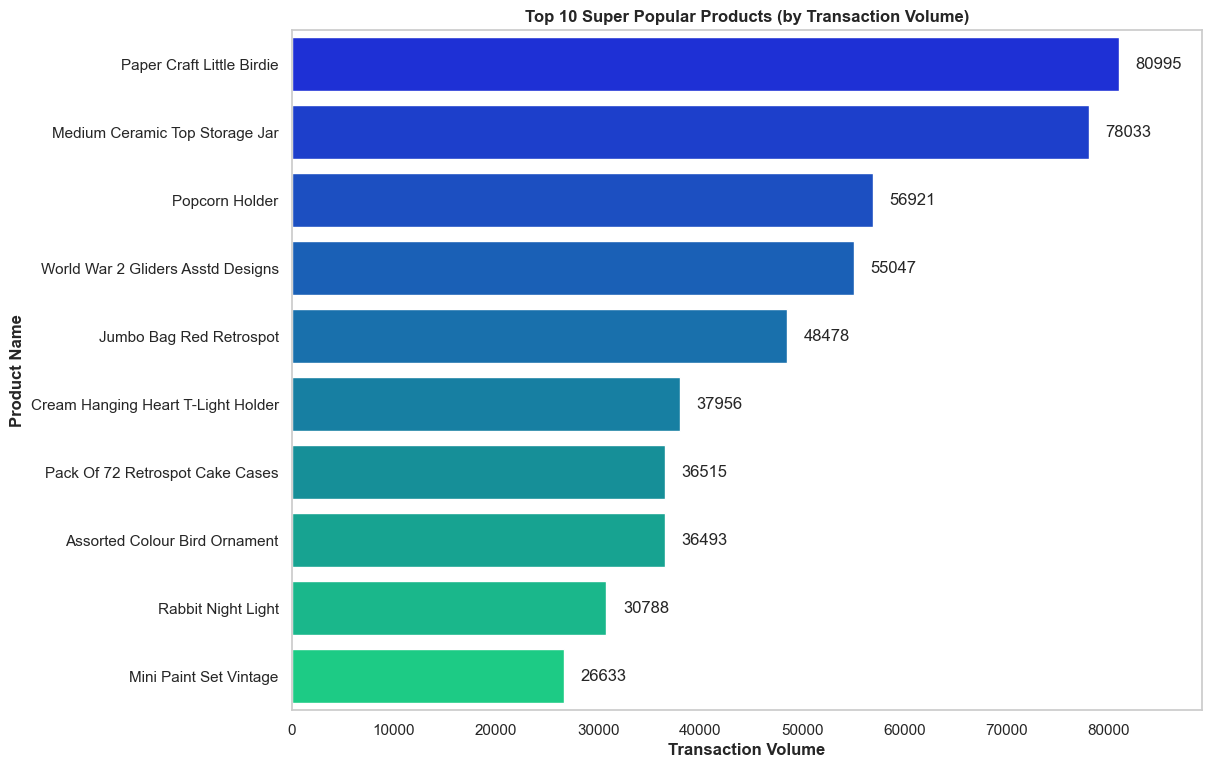

In [69]:
# Hitung total revenue per produk
top10_revenue = (
    df_sales
    .groupby('ProductName')['Quantity']
    .sum()
    .reset_index()
    .sort_values('Quantity', ascending=False)
    .head(10)
)

# Plot Bar Chart Top 10
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top10_revenue,
    x='Quantity',
    y='ProductName',
    hue="ProductName",
    legend=False,
    palette="winter"
)
ax.grid(False)
plt.title('Top 10 Super Popular Products (by Transaction Volume)',fontweight="bold")
plt.xlabel('Transaction Volume',fontweight="bold")
plt.ylabel('Product Name',fontweight="bold")

# Cari nilai maksimum untuk menentukan offset teks
max_quantity = top10_revenue['Quantity'].max()

# Tambahkan angka di setiap bar dengan penyesuaian posisi
for p in ax.patches:
    width = p.get_width()
    yloc = p.get_y() + p.get_height()/2
    # Gunakan offset yang proporsional dengan nilai maksimum
    offset = max_quantity * 0.02  # 2% dari nilai maksimum
    ax.text(
        width + offset,  # Posisi x: lebar bar + offset
        yloc,
        f"{width:.0f}",
        va='center',
        ha='left'  # Penyelarasan horizontal ke kiri
    )

# Atur margin dan batas plot
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.1)
ax.set_xlim(right=max_quantity * 1.1)  # Tambahkan 10% ruang ekstra di sebelah kanan

plt.show()

# Retention Cohort Analysis

Analisis kohort adalah metode analisis yang digunakan untuk mempelajari perilaku konsumen atau pengguna dari kelompok yang sama dalam periode waktu tertentu.   
Contoh Kohort : Kohort kustomer yang bergabung pada bulan mei

Analisis retensi adalah analisis untuk melihat seberapa besar persentase pengguna atau pelanggan yang kembali menggunakan produk atau layanan dalam periode waktu tertentu.

Dengan menganalisis kohort dan retensi, perusahaan atau organisasi dapat mengidentifikasi tren dan pola dalam perilaku pengguna atau pelanggan.

Berikut cuplikan matriks retensi yang akan kalian hasilkan pada bagian ini : 

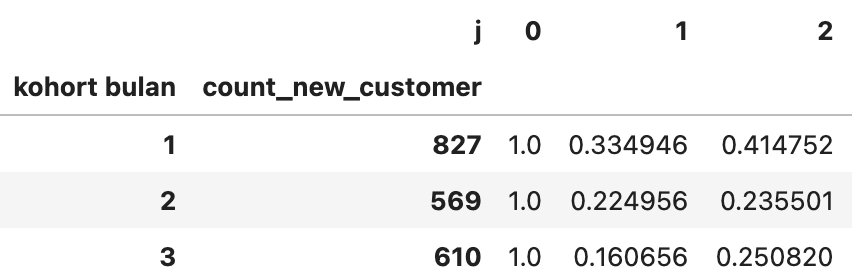

Cara baca :  
Pada bulan januari, ada 827 customer baru.  
33% dari 827 customer melakukan transaksi 1 bulan kemudian.  
41.4% dari 827 customer melakukan transasksi 2 bulan kemduain.  

Hal ini menunjukkan bahwa sekitar sepertiga customer yang melanjutkan transaksi setelah mendaftar pada bulan januari.  

Sedangkan pada kohort bulan februari, ada 569 customer baru dan hanya 22% customer yang kembali bertransaksi sebulan setelahnya  

Buatlah matriks kohort retensi per bulan menggunakan data dari 1 januari 2019 hingga 30 november 2019
Petunjuk : 
1. Hitung tanggal berapa transaksi pertama customer. Disini kita menggunakna asumsi bahwa transaksi pertama pada tahun 2019 adalah transaksi pertama customer.
2. Lakukan iterasi untuk setiap bulan. Ambil berapa banyak customer yang mendaftar dan berapa banyak customer yang sama yang melakukan transaksi di bulan bulan berikutnya.

## Pertanyaan
1. Bagaimana karakteristik pertumbuhan customer baru? Apakah pertumbuhan terus meningkat atau melambat?

2. Setiap bulannya tim marketing menggunakan metode promosi campaign yang berbeda-beda. Bulan mana yang menghasilkan retention paling tinggi?

## Cohort Analysis


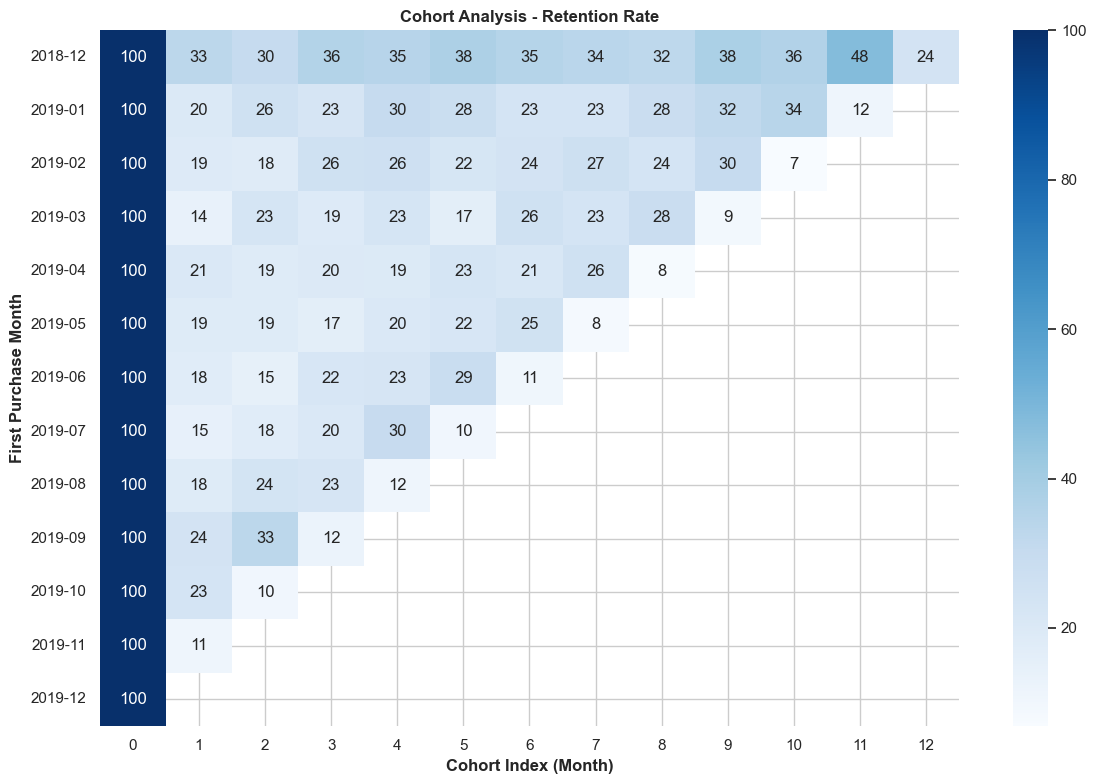

In [71]:
# Mengambil subset data yang diperlukan untuk cohort analysis
cohort_data = df_sales[['CustomerNo', 'Date']].copy()  # Menambahkan .copy() untuk menghindari warning

# Mengonversi kolom 'Date' menjadi tipe datetime
cohort_data['Date'] = pd.to_datetime(cohort_data['Date'])

# Membuat kolom untuk bulan transaksi
cohort_data['TransactionMonth'] = cohort_data['Date'].dt.to_period('M')

# Menentukan bulan pembelian pertama untuk setiap customer
first_purchase = cohort_data.groupby('CustomerNo')['TransactionMonth'].min()
cohort_data['FirstPurchaseMonth'] = cohort_data['CustomerNo'].map(first_purchase)

# Menghitung perbedaan bulan antara transaksi dan pembelian pertama
cohort_data['CohortIndex'] = (cohort_data['TransactionMonth'] - cohort_data['FirstPurchaseMonth']).apply(lambda x: x.n)

# Menghitung jumlah unique customer di setiap cohort
cohort_counts = cohort_data.groupby(['FirstPurchaseMonth', 'CohortIndex'])['CustomerNo'].nunique().reset_index()

# Membuat pivot table
cohort_pivot = cohort_counts.pivot(index='FirstPurchaseMonth', columns='CohortIndex', values='CustomerNo')

# Menghitung retention rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0) * 100

# Plotting the Cohort Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0f', cmap='Blues')  # Sudah diperbaiki
plt.title('Cohort Analysis - Retention Rate', fontweight="bold")
plt.xlabel('Cohort Index (Month)', fontweight="bold")
plt.ylabel('First Purchase Month', fontweight="bold")
plt.tight_layout()
plt.show()

## Customer Growth


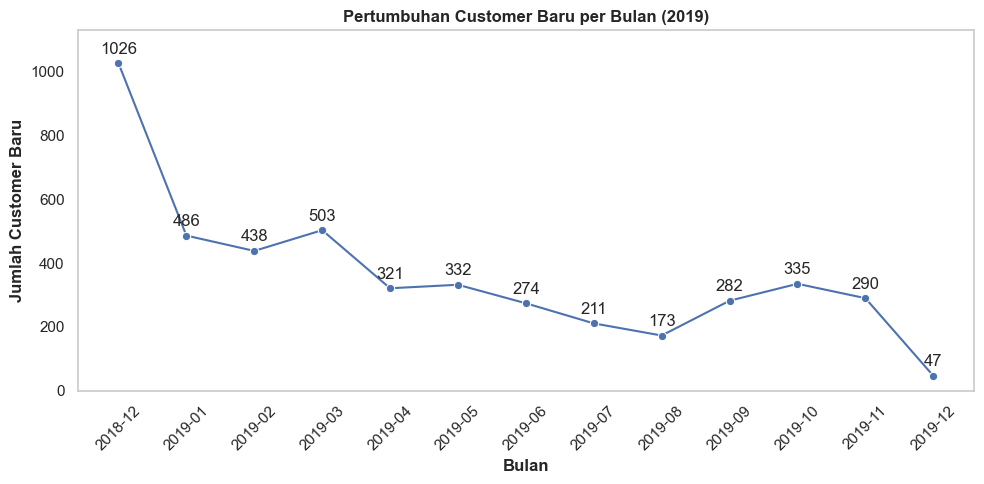

In [73]:
# Hitung FirstPurchaseMonth
first_purchase = df_sales.groupby('CustomerNo')['Date'].min().reset_index()
first_purchase.columns = ['CustomerNo', 'FirstPurchaseDate']
first_purchase['FirstPurchaseMonth'] = first_purchase['FirstPurchaseDate'].dt.to_period('M')

# Gabungkan back ke df_sales
df = df_sales.merge(first_purchase[['CustomerNo', 'FirstPurchaseMonth']], on='CustomerNo', how='left')
df['TransactionMonth'] = df['Date'].dt.to_period('M')

# Growth trend: jumlah customer baru per bulan
new_customers = first_purchase.groupby('FirstPurchaseMonth').CustomerNo.nunique().reset_index()
new_customers.columns = ['Month', 'NewCustomers']
# Sebelum plotting, pastikan Month bertipe string
new_customers['Month'] = new_customers['Month'].astype(str)

plt.figure(figsize=(10,5))
ax = sns.lineplot(data=new_customers, x='Month', y='NewCustomers', marker='o')
ax.grid(False)
plt.title('Pertumbuhan Customer Baru per Bulan (2019)', fontweight="bold")
plt.xlabel('Bulan', fontweight="bold")
plt.ylabel('Jumlah Customer Baru', fontweight="bold")
plt.xticks(rotation=45)
plt.ylim(0, new_customers["NewCustomers"].max() * 1.1)

# Menambahkan angka di setiap titik
for x, y in zip(new_customers['Month'], new_customers['NewCustomers']):
    ax.text(x, y + new_customers['NewCustomers'].max()*0.02,  # sedikit di atas titik
            f"{int(y)}",
            ha='center',
            va='bottom')

plt.tight_layout()
plt.show()

# Time Series Analysis

Time series analysis adalah analisis untuk melihat trend suatu fenomena berdasarkan waktu.

## Pertanyaan 

Pertanyaan 1 :  
Coba totalkan penjualan setiap barang per hari.   
Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.

Pertanyaan 2 :  
Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.  


## Trend Penjualan Per Hari

          Date  TotalRevenue
0   2018-12-01     326820.08
1   2018-12-02     367316.62
2   2018-12-03     206313.62
3   2018-12-05     197565.27
4   2018-12-06     273420.10
..         ...           ...
300 2019-12-05     289050.50
301 2019-12-06     197440.51
302 2019-12-07     264266.66
303 2019-12-08     223265.49
304 2019-12-09    1106069.97

[305 rows x 2 columns]


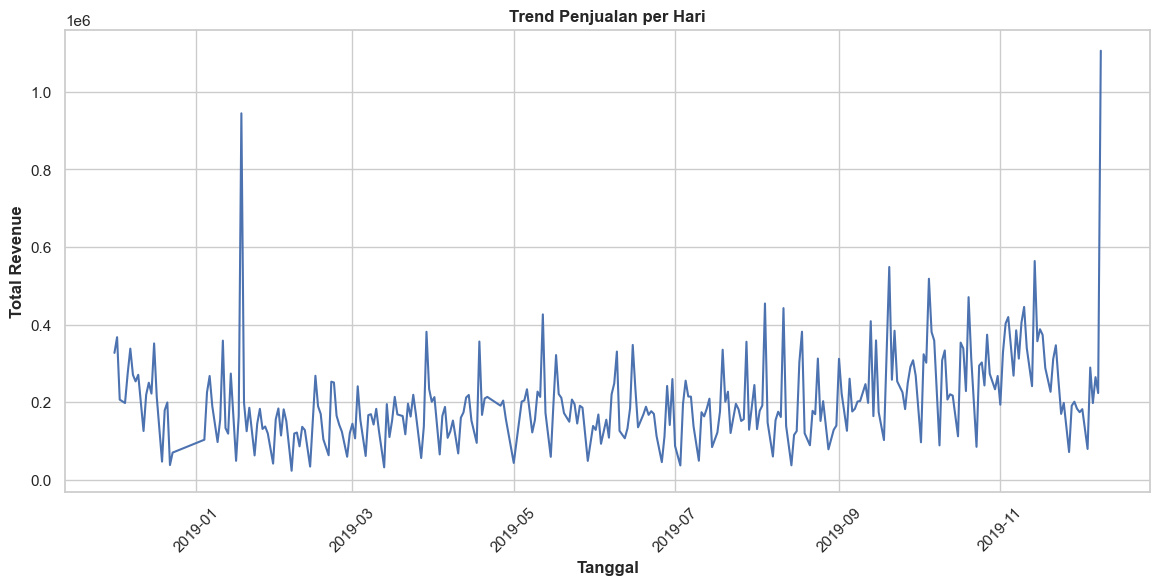

In [75]:
# === Pertanyaan 1: Trend Penjualan per Hari ===
# Totalkan penjualan setiap barang per hari
sales_per_day = df_sales.groupby('Date')['TotalRevenue'].sum().reset_index()
print(sales_per_day)

# Plotting trend penjualan
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='TotalRevenue', data=sales_per_day)
plt.title('Trend Penjualan per Hari', fontweight="bold")
plt.xlabel('Tanggal', fontweight="bold")
plt.ylabel('Total Revenue', fontweight="bold")
plt.xticks(rotation=45)
plt.show()

## Trend Penjualan Per Hari (Jul - 2029)

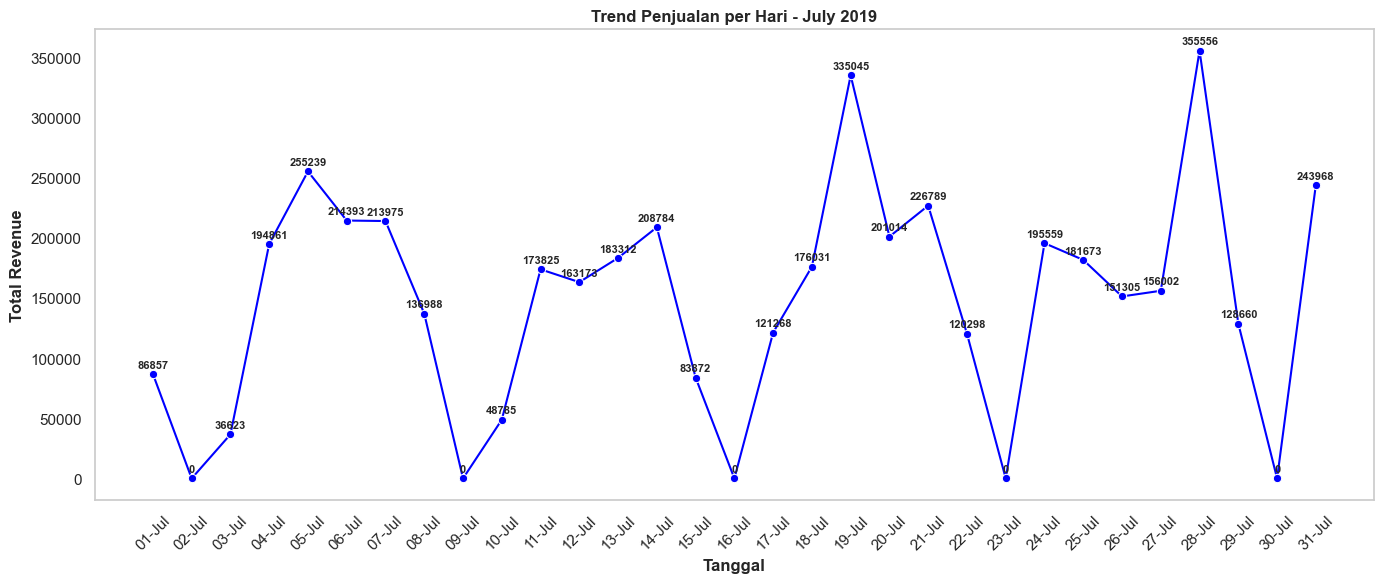

In [77]:
# Pastikan kolom 'Date' dalam format datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Filter hanya data untuk bulan November 2019
november_data = df_sales[df_sales['Date'].dt.to_period('M') == '2019-07']

# Hitung total penjualan per hari
sales_per_day_nov = november_data.groupby('Date')['TotalRevenue'].sum().reset_index()

# Buat list semua tanggal di bulan November 2019
all_november_dates = pd.date_range(start='2019-07-01', end='2019-07-31')
sales_per_day_nov = (
    sales_per_day_nov.set_index('Date')
    .reindex(all_november_dates, fill_value=0)
    .rename_axis('Date')
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(x='Date', y='TotalRevenue', data=sales_per_day_nov, marker='o', color='blue')
plt.title('Trend Penjualan per Hari - July 2019', fontweight="bold")
plt.xlabel('Tanggal', fontweight="bold")
plt.ylabel('Total Revenue', fontweight="bold")
plt.xticks(ticks=all_november_dates, labels=[date.strftime('%d-%b') for date in all_november_dates], rotation=45)
plt.grid(False)

# Tambahkan label total revenue di setiap titik
for x, y in zip(sales_per_day_nov['Date'], sales_per_day_nov['TotalRevenue']):
    ax.text(x, y + sales_per_day_nov['TotalRevenue'].max() * 0.01, f"{int(y)}", ha='center', va='bottom', fontsize=8, fontweight="bold")

plt.tight_layout()
plt.show()

## Trend Penjualan Per Hari (Nov - 2029)

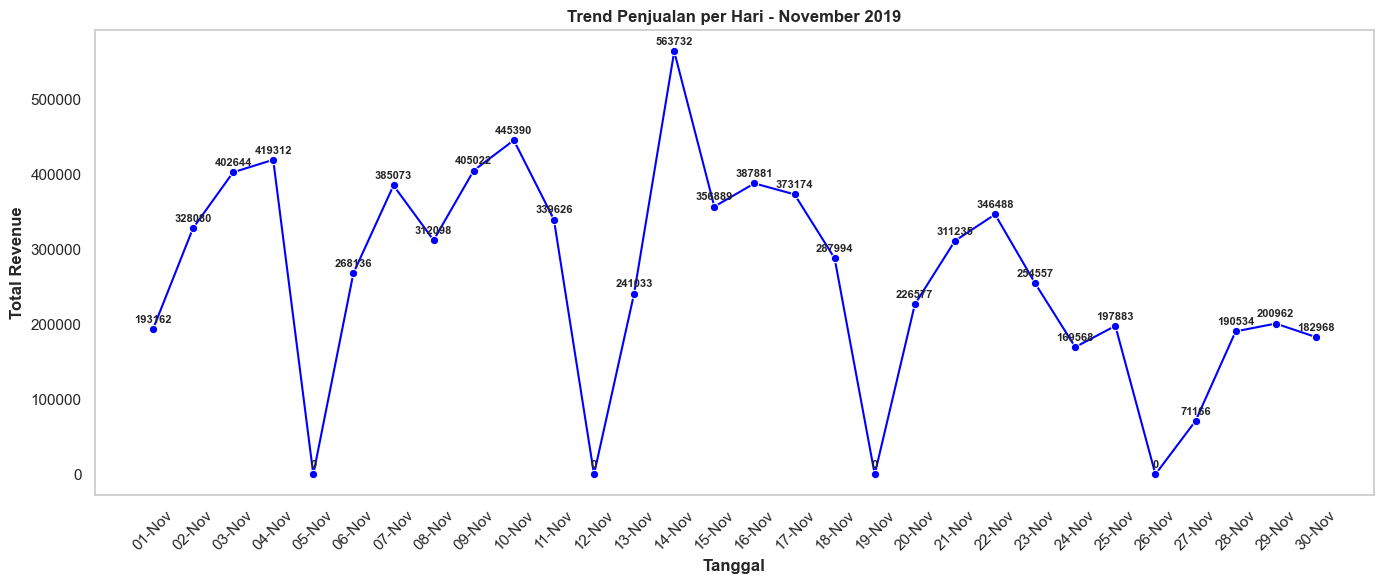

In [79]:
# Pastikan kolom 'Date' dalam format datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Filter hanya data untuk bulan November 2019
november_data = df_sales[df_sales['Date'].dt.to_period('M') == '2019-11']

# Hitung total penjualan per hari
sales_per_day_nov = november_data.groupby('Date')['TotalRevenue'].sum().reset_index()

# Buat list semua tanggal di bulan November 2019
all_november_dates = pd.date_range(start='2019-11-01', end='2019-11-30')
sales_per_day_nov = (
    sales_per_day_nov.set_index('Date')
    .reindex(all_november_dates, fill_value=0)
    .rename_axis('Date')
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(x='Date', y='TotalRevenue', data=sales_per_day_nov, marker='o', color='blue')
plt.title('Trend Penjualan per Hari - November 2019', fontweight="bold")
plt.xlabel('Tanggal', fontweight="bold")
plt.ylabel('Total Revenue', fontweight="bold")
plt.xticks(ticks=all_november_dates, labels=[date.strftime('%d-%b') for date in all_november_dates], rotation=45)
plt.grid(False)

# Tambahkan label total revenue di setiap titik
for x, y in zip(sales_per_day_nov['Date'], sales_per_day_nov['TotalRevenue']):
    ax.text(x, y + sales_per_day_nov['TotalRevenue'].max() * 0.01, f"{int(y)}", ha='center', va='bottom', fontsize=8, fontweight="bold")

plt.tight_layout()
plt.show()

## Total Order Sehari dalam Seminggu

        Date DayOfWeek
0 2019-12-09    Monday
1 2019-12-09    Monday
2 2019-12-09    Monday
3 2019-12-09    Monday
4 2019-12-09    Monday
   DayOfWeek  TotalOrders
0     Monday       3112.0
1    Tuesday          NaN
2  Wednesday       2203.0
3   Thursday       3079.0
4     Friday       3516.0


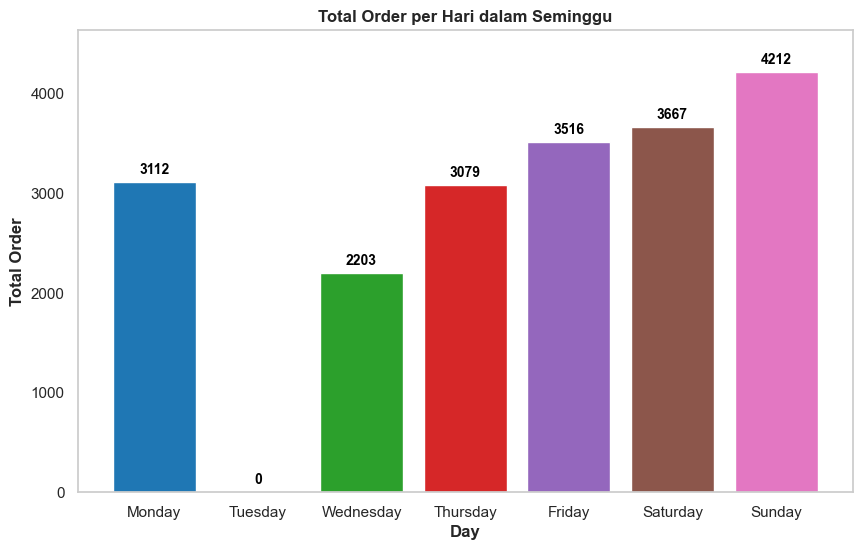

In [81]:
# === Pertanyaan 2: Analisis Seasonality ===

# Membuat kolom 'DayOfWeek' berdasarkan kolom 'Date' dengan .loc agar menghindari SettingWithCopyWarning
df_sales.loc[:, 'DayOfWeek'] = df_sales['Date'].dt.day_name()

# Mengecek apakah kolom 'DayOfWeek' sudah berhasil dibuat
print(df_sales[['Date', 'DayOfWeek']].head())

# Menghitung total order per hari dalam seminggu
total_orders_per_day = (
    df_sales
    .groupby('DayOfWeek')['TransactionNo']
    .nunique()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index()
)
total_orders_per_day.columns = ['DayOfWeek', 'TotalOrders']

print(total_orders_per_day.head())

# Mengisi nilai NaN dengan 0
total_orders_per_day['TotalOrders'] = total_orders_per_day['TotalOrders'].fillna(0)

# Pilih palet dari Seaborn, misalnya 'tab10' dengan 7 warna
palette = sns.color_palette('tab10', 7)

# Visualisasi total order per hari dalam seminggu
plt.figure(figsize=(10, 6))
bars = plt.bar(
    total_orders_per_day['DayOfWeek'],
    total_orders_per_day['TotalOrders'],
    color=palette
)
plt.title('Total Order per Hari dalam Seminggu', fontweight="bold")
plt.xlabel('Day', fontweight="bold")
plt.ylabel('Total Order', fontweight="bold")
plt.ylim(0, total_orders_per_day["TotalOrders"].max() * 1.1)

# Menampilkan jumlah order pada tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 50,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight="bold"
    )
    plt.grid(False)

plt.show()

# Price Elasticity

Price sensitivity atau sensitifitas harga mengacu pada perubahan permintaan pelanggan akibat naik atau turunya harga suatu produk.

Pada bagian ini anda akan diminta untuk melakukan analisis terhadap suatu produk yang penjualannya sangat dipengaruhi oleh harga.

## Pertanyaan

Pertanyaan 1 :   
Produk apa yang paling sering mengalami perubahan harga?   
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

Price Elasticity akan semakin baik dianalisis ketika lebih banyak variasi harga yang muncul.

Pertanyaan 2 :   
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.  
Barang manakah yang memiliki korelasi paling negatif?  

Pertanyaan 3 : 
Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.  
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

## Produk dengan Elastisitas Tertinggi

                              ProductName  UniquePriceCount
6         12 Message Cards With Envelopes                11
7           12 Pencil Small Tube Woodland                11
8     12 Pencils Small Tube Red Retrospot                10
18    15cm Christmas Glass Ball 20 Lights                12
25                20 Dolly Pegs Retrospot                10
...                                   ...               ...
3670    World War 2 Gliders Asstd Designs                10
3733            Zinc Folkart Sleigh Bells                11
3738    Zinc Heart Lattice T-Light Holder                10
3743          Zinc Metal Heart Decoration                10
3750      Zinc Willie Winkie Candle Stick                13

[700 rows x 2 columns]
     index                        ProductName  UniquePriceCount
128    694                      Chilli Lights                23
278   1584  Hot Water Bottle Tea And Sympathy                20
158    796          Cook With Wine Metal Sign                20


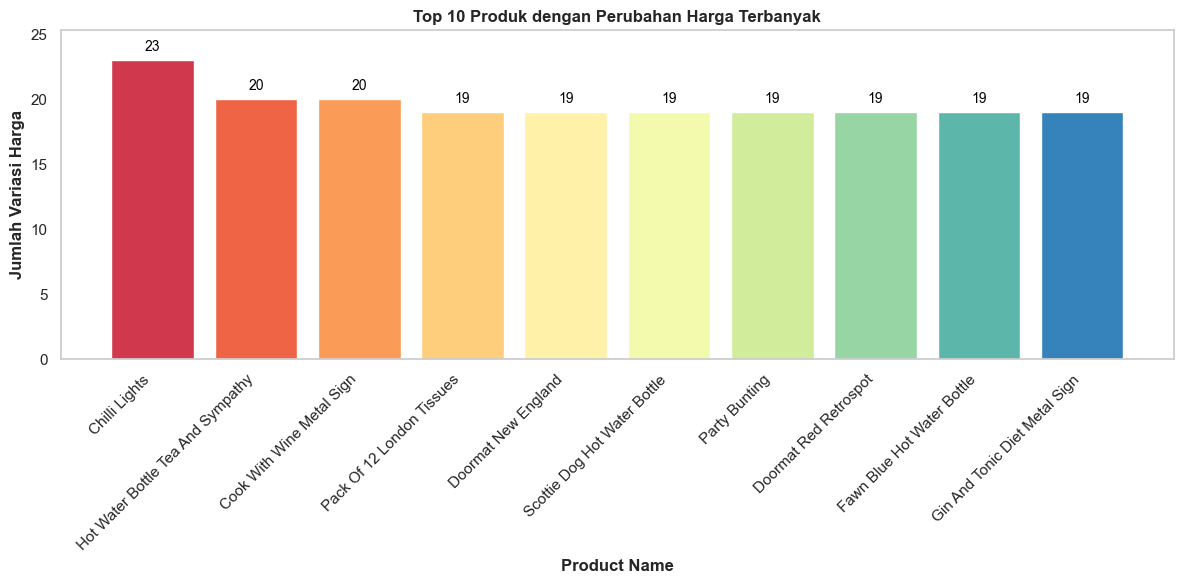

In [83]:
# === Pertanyaan 1: Produk dengan Perubahan Harga Terbanyak ===

# Menghitung banyaknya variasi harga unik untuk setiap produk
price_variation = df_sales.groupby('ProductName')['Price'].nunique().reset_index()
price_variation.columns = ['ProductName', 'UniquePriceCount']

# Mengambil produk yang memiliki setidaknya 10 variasi harga
high_price_variation_products = price_variation[price_variation['UniquePriceCount'] >= 10]

# Menampilkan hasil
print(high_price_variation_products)

top10_high_price_variation_products = (
    high_price_variation_products
    .reset_index()
    .sort_values('UniquePriceCount', ascending=False)
    .head(10)
)

# Menampilkan hasil
print(top10_high_price_variation_products)

# Visualisasi Produk dengan Perubahan Harga Terbanyak
plt.figure(figsize=(12,6))
palette = sns.color_palette("Spectral", n_colors=10)
bars = plt.bar(
    top10_high_price_variation_products['ProductName'],
    top10_high_price_variation_products['UniquePriceCount'],
    color=palette
)
plt.title('Top 10 Produk dengan Perubahan Harga Terbanyak', fontweight='bold')
plt.xlabel('Product Name', fontweight='bold')
plt.ylabel('Jumlah Variasi Harga', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.ylim(0, top10_high_price_variation_products["UniquePriceCount"].max() * 1.1)

# Tambahkan angka di atas tiap bar
max_var = top10_high_price_variation_products['UniquePriceCount'].max()
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + max_var*0.02,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## Korelasi Harga vs Quantity

In [85]:
# === Pertanyaan 2: Korelasi antara Harga dan Quantity ===

# Mengambil data penjualan hanya untuk produk dengan variasi harga >= 10
filtered_sales = df_sales[df_sales['ProductName'].isin(high_price_variation_products['ProductName'])]

# Menghitung korelasi antara harga dan quantity untuk setiap produk
correlations = filtered_sales.groupby('ProductName').agg(
    Correlation=('Price', lambda x: x.corr(filtered_sales.loc[x.index, 'Quantity']))
).reset_index()

# Mengurutkan berdasarkan nilai korelasi dari yang paling negatif
correlations = correlations.sort_values('Correlation')

# Menampilkan produk dengan korelasi paling negatif
print(correlations.head())

# Menampilkan hasil
print(correlations)

                             ProductName  Correlation
521   Set Of 2 Tea Towels Ping Microwave    -0.477738
598  Squarecushion Cover Pink Union Jack    -0.461947
311          Large Cake Towel Pink Spots    -0.439484
60               Bag 500g Swirly Marbles    -0.436841
426                   Pizza Plate In Box    -0.436719
                             ProductName  Correlation
521   Set Of 2 Tea Towels Ping Microwave    -0.477738
598  Squarecushion Cover Pink Union Jack    -0.461947
311          Large Cake Towel Pink Spots    -0.439484
60               Bag 500g Swirly Marbles    -0.436841
426                   Pizza Plate In Box    -0.436719
..                                   ...          ...
560  Set/10 Ivory Polkadot Party Candles     0.130945
24            6 Gift Tags 50'S Christmas     0.135854
486         Roll Wrap 50'S Red Christmas     0.138331
18     3d Traditional Christmas Stickers     0.143960
434     Playing Cards Jubilee Union Jack     0.193171

[700 rows x 2 columns]


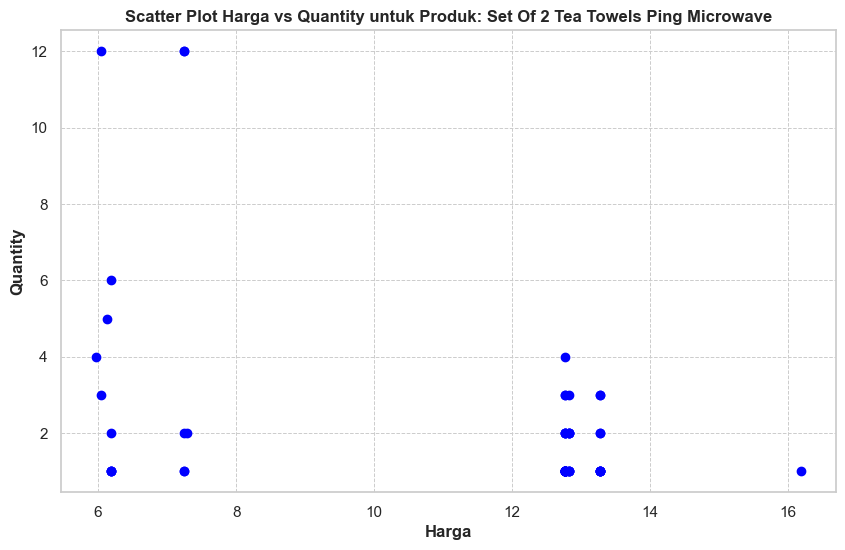

In [87]:
# === Pertanyaan 3: Scatter Plot antara Harga dan Quantity ===
# Menghitung korelasi antara Price dan Quantity untuk setiap produk
correlation_per_product = (
    filtered_sales.groupby('ProductName')[['Price', 'Quantity']]
    .corr()
    .unstack()
    .iloc[:, 1]
    .reset_index()
)

# Mengubah nama kolom menjadi 'ProductName' dan 'Correlation'
correlation_per_product.columns = ['ProductName', 'Correlation']

# Mengurutkan berdasarkan korelasi untuk mencari korelasi negatif terbesar
most_negative_correlation = correlation_per_product.sort_values(by='Correlation', ascending=True).head(1)


# Mengurutkan berdasarkan korelasi untuk mencari korelasi negatif terbesar
most_negative_correlation = correlation_per_product.sort_values(by='Correlation', ascending=True).head(1)

# Mengambil nama produk dengan korelasi paling negatif
most_negative_product = most_negative_correlation['ProductName'].values[0]

# Filter data untuk produk tersebut
product_data = filtered_sales[filtered_sales['ProductName'] == most_negative_product]

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(product_data['Price'], product_data['Quantity'], color='blue')
plt.title(f'Scatter Plot Harga vs Quantity untuk Produk: {most_negative_product}', fontweight='bold')
plt.xlabel('Harga',fontweight='bold')
plt.ylabel('Quantity',fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

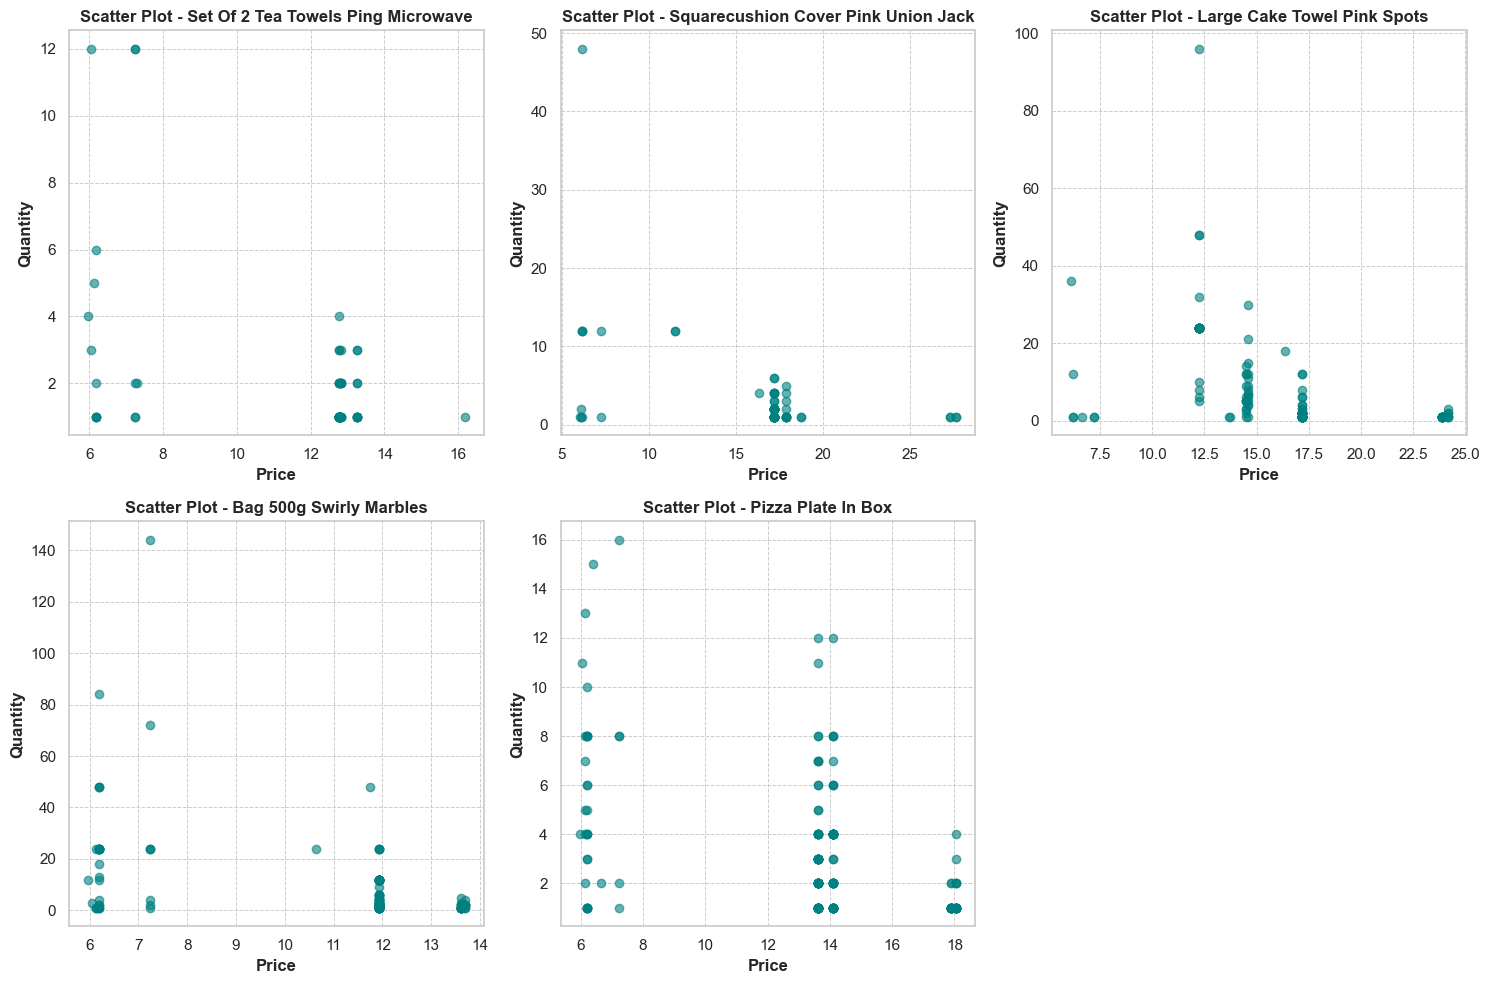

In [89]:
# === Visualisasi Scatter Plot untuk Produk dengan Korelasi Paling Negatif ===

# Mendapatkan nama-nama produk dengan korelasi paling negatif
negatively_correlated_products = correlations.sort_values('Correlation').head(5)['ProductName'].tolist()

plt.figure(figsize=(15, 10))

# Membuat scatter plot untuk setiap produk yang memiliki korelasi paling negatif
for i, product in enumerate(negatively_correlated_products, 1):
    plt.subplot(2, 3, i)
    product_data = filtered_sales[filtered_sales['ProductName'] == product]
    
    plt.scatter(product_data['Price'], product_data['Quantity'], color='teal', alpha=0.6)
    plt.title(f'Scatter Plot - {product}', fontsize=12,fontweight='bold')
    plt.xlabel('Price',fontweight='bold')
    plt.ylabel('Quantity',fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Basket Size Analysis

Ketika seorang pelanggan e-commerce menekan "add to cart", maka barang tersebut akan disimpan dalam sebuah "basket".  
Ketika melakukan checkout, maka semua barang dalam basket tersebut akan diproses dan dikirimkan.  
Ukuran dari basket dapat diukur melalui nilai GMV (Gross merchandise volume) yang merupakan total harga barang yang dibeli.  
Contoh : 
Pada tanggal 1 januari 2012
Tuan A membeli 1 shampoo seharga 15ribu dan 2 sabun seharga 20ribu masing-masing. Maka basket size tuan A adalah 55ribu rupiah.
Nyonya B hanya membeli 1 cemilan seharga 20 ribu, maka basket size dari nyonya B adalah 20 ribu rupiah.
Berarti total GMV ecommerce pada 1 januari 2012 adalah 75ribu rupiah, dengan rata-rata basket size sebesar 37.5 ribu rupiah per basket.

## Pertanyaan
1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?
2. Apakah ada perbedaan ukuran basket dari negara yang berbeda ?

## Average Basket Size per Transaksi per Hari

In [91]:
# Menghitung basket size untuk setiap transaksi (InvoiceNo) dengan menjumlahkan nilai GMV
df_sales.loc[:, 'BasketSize'] = df_sales['Price'] * df_sales['Quantity']

# Menghitung rata-rata basket size per hari
basket_size_per_day = df_sales.groupby('Date')['BasketSize'].sum().reset_index()
basket_size_per_day['Date'] = pd.to_datetime(basket_size_per_day['Date'])

# Menghitung rata-rata basket size per hari
avg_basket_size_per_day = basket_size_per_day.groupby('Date')['BasketSize'].mean().reset_index()

# Menampilkan hasil
print('Rata-Rata Basket Size per Hari:')
basket_size_per_day_summary = basket_size_per_day.describe()
print(basket_size_per_day_summary)

Rata-Rata Basket Size per Hari:
                                Date    BasketSize
count                            305  3.050000e+02
mean   2019-06-10 20:03:56.065573888  2.064455e+05
min              2018-12-01 00:00:00  2.289213e+04
25%              2019-03-10 00:00:00  1.361826e+05
50%              2019-06-14 00:00:00  1.853842e+05
75%              2019-09-12 00:00:00  2.526051e+05
max              2019-12-09 00:00:00  1.106070e+06
std                              NaN  1.183529e+05


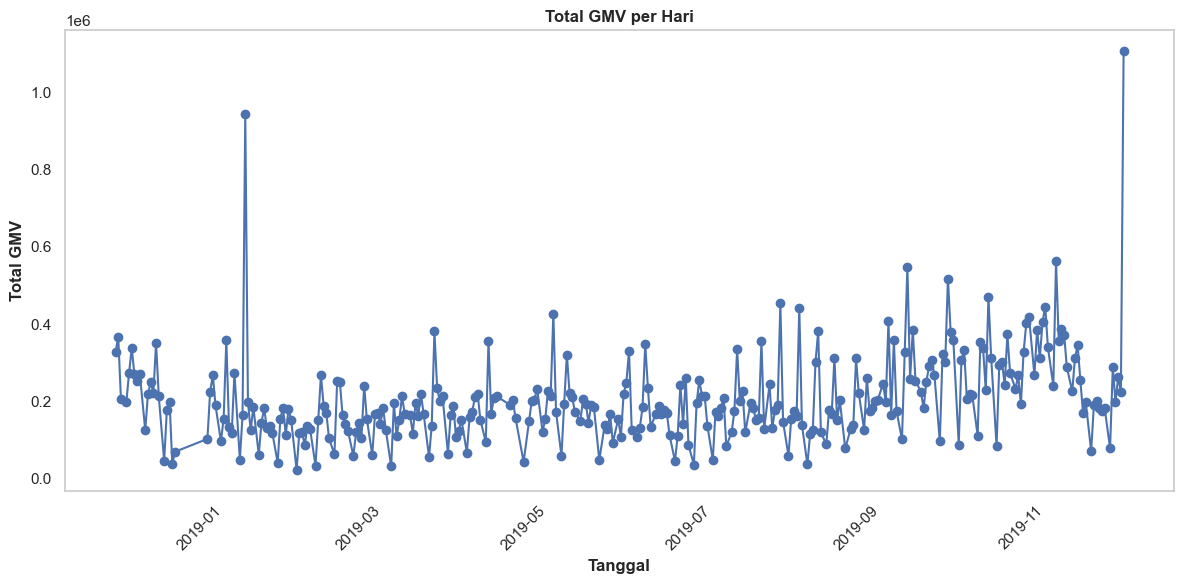

In [93]:
# Hitung BasketSize per transaksi
df_sales.loc[:, 'BasketSize'] = df_sales['Price'] * df_sales['Quantity']

# Total GMV per hari
gmv_per_day = (
    df_sales
    .groupby(df_sales['Date'].dt.date)['BasketSize']
    .sum()
    .reset_index(name='TotalGMV')
)
gmv_per_day['Date'] = pd.to_datetime(gmv_per_day['Date'])

plt.figure(figsize=(12, 6))
plt.plot(gmv_per_day['Date'], gmv_per_day['TotalGMV'], marker='o', linestyle='-')
plt.title('Total GMV per Hari',fontweight='bold')
plt.xlabel('Tanggal',fontweight='bold')
plt.ylabel('Total GMV',fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

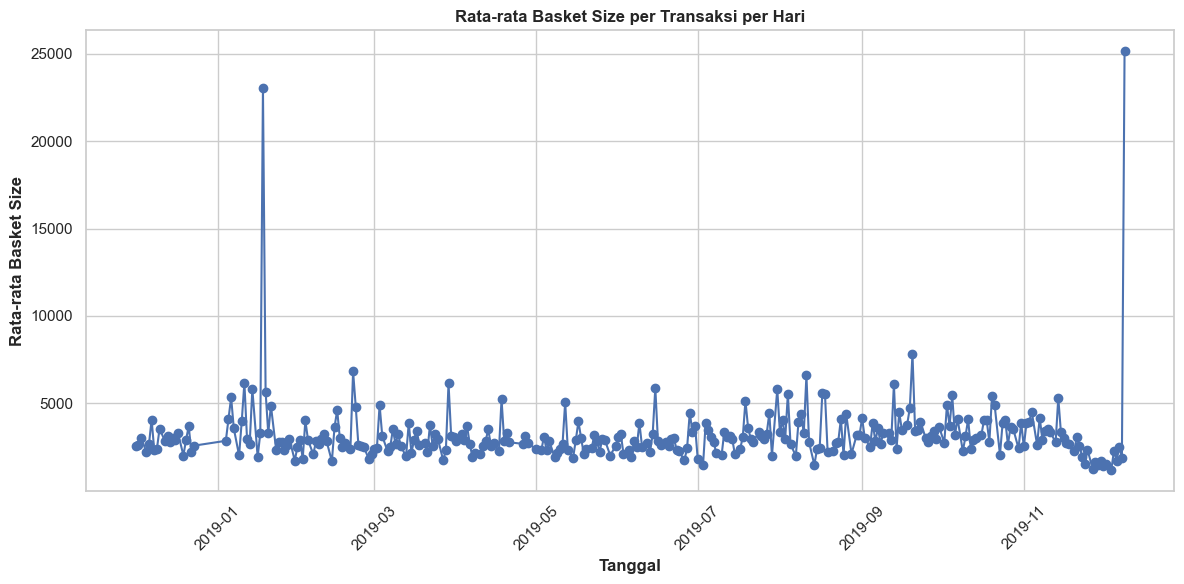

In [95]:
# Hitung BasketSize per transaksi
df_sales.loc[:, 'BasketSize'] = df_sales['Price'] * df_sales['Quantity']

# Rata-rata BasketSize per transaksi per hari
avg_basket_per_day = (
    df_sales
    .groupby(['Date', 'TransactionNo'])['BasketSize']
    .sum()
    .reset_index()
    .groupby('Date')['BasketSize']
    .mean()
    .reset_index(name='AvgBasketSize')
)
avg_basket_per_day['Date'] = pd.to_datetime(avg_basket_per_day['Date'])

plt.figure(figsize=(12, 6))
plt.plot(avg_basket_per_day['Date'], avg_basket_per_day['AvgBasketSize'], marker='o', linestyle='-')
plt.title('Rata-rata Basket Size per Transaksi per Hari', fontweight='bold')
plt.xlabel('Tanggal', fontweight='bold')
plt.ylabel('Rata-rata Basket Size', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

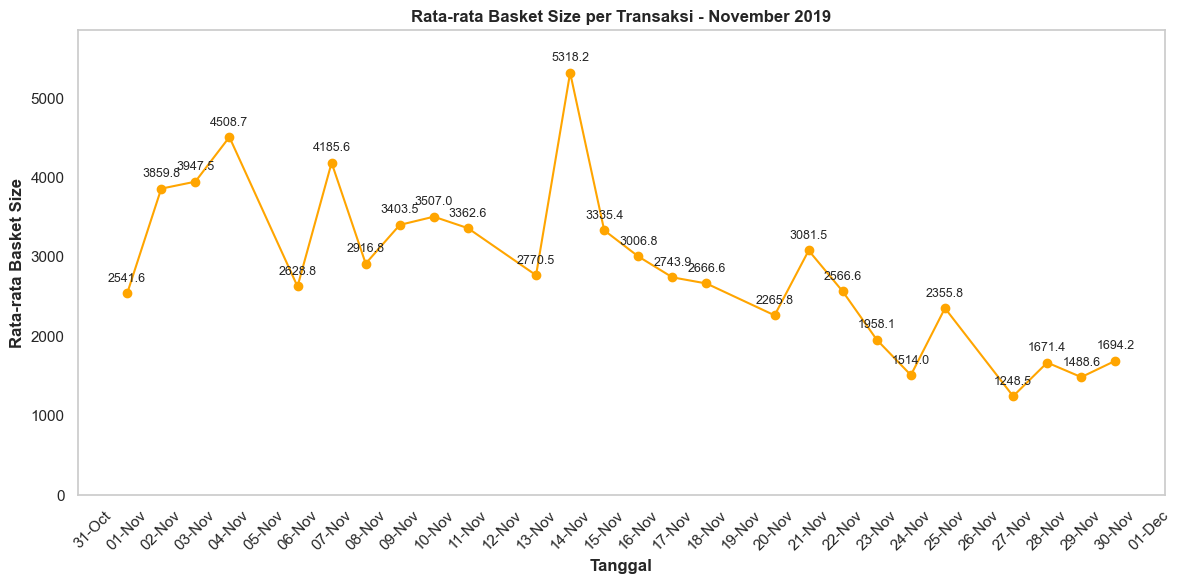

In [99]:
import matplotlib.dates as mdates

# Hitung BasketSize per transaksi
df_sales.loc[:, 'BasketSize'] = df_sales['Price'] * df_sales['Quantity']

# Filter hanya untuk bulan November 2019
november_sales = df_sales[df_sales['Date'].dt.to_period('M') == '2019-11']

# Rata-rata BasketSize per transaksi per hari di bulan November 2019
avg_basket_nov = (
    november_sales
    .groupby(['Date', 'TransactionNo'])['BasketSize']
    .sum()
    .reset_index()
    .groupby('Date')['BasketSize']
    .mean()
    .reset_index(name='AvgBasketSize')
)
avg_basket_nov['Date'] = pd.to_datetime(avg_basket_nov['Date'])

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(avg_basket_nov['Date'], avg_basket_nov['AvgBasketSize'], marker='o', linestyle='-', color='orange')
plt.title('Rata-rata Basket Size per Transaksi - November 2019', fontweight='bold')
plt.xlabel('Tanggal', fontweight='bold')
plt.ylabel('Rata-rata Basket Size', fontweight='bold')
plt.ylim(0, avg_basket_nov['AvgBasketSize'].max() * 1.1)

# Tampilkan semua tanggal di sumbu X
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.xticks(rotation=45)

# Tambahkan angka di setiap titik
for x, y in zip(avg_basket_nov['Date'], avg_basket_nov['AvgBasketSize']):
    plt.text(x, y + avg_basket_nov['AvgBasketSize'].max() * 0.02, f"{y:.1f}", ha='center', va='bottom', fontsize=9)

plt.grid(False)
plt.tight_layout()
plt.show()

## Average Basker Size per Transaksi per Bulan

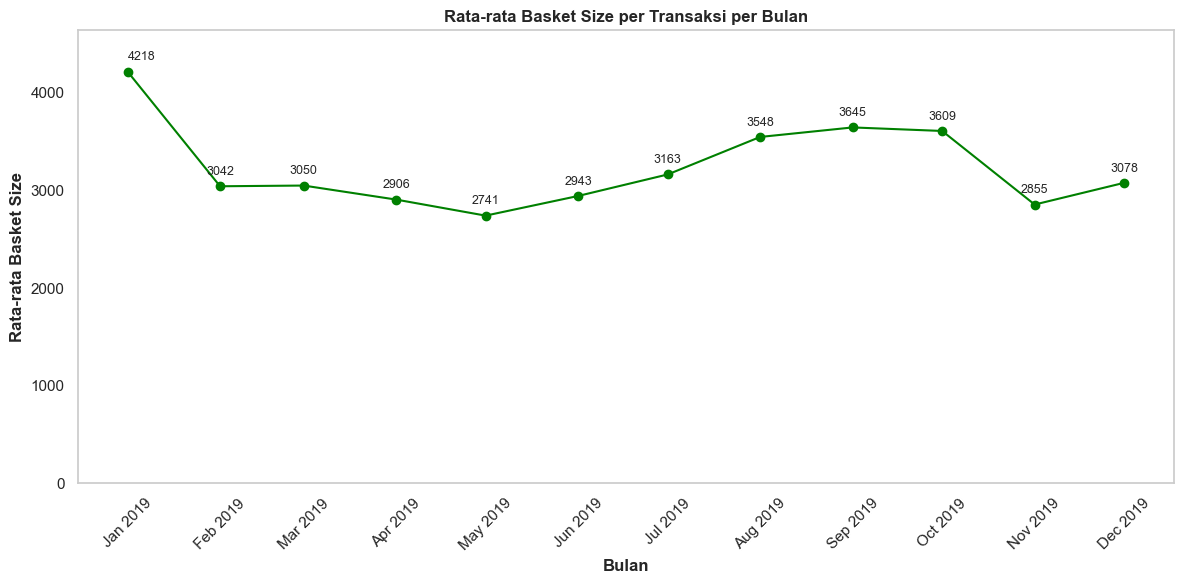

In [101]:
# Pastikan kolom Date dalam format datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Hitung BasketSize per transaksi
df_sales.loc[:, 'BasketSize'] = df_sales['Price'] * df_sales['Quantity']

# Hitung total BasketSize per transaksi
basket_per_transaction = (
    df_sales
    .groupby(['Date', 'TransactionNo'])['BasketSize']
    .sum()
    .reset_index()
)

# Tambahkan kolom bulan
basket_per_transaction['Month'] = basket_per_transaction['Date'].dt.to_period('M')

# Hitung rata-rata basket size per transaksi per bulan
avg_basket_per_month = (
    basket_per_transaction
    .groupby('Month')['BasketSize']
    .mean()
    .reset_index(name='AvgBasketSize')
)

# Konversi kembali kolom bulan ke timestamp agar bisa diplot
avg_basket_per_month['Month'] = avg_basket_per_month['Month'].dt.to_timestamp()

# Tambahkan semua bulan dari Januari - Desember (2019)
all_months = pd.date_range(start='2019-01-01', end='2019-12-01', freq='MS')
avg_basket_per_month = avg_basket_per_month.set_index('Month').reindex(all_months).reset_index()
avg_basket_per_month.columns = ['Month', 'AvgBasketSize']

# Ganti NaN dengan 0 jika tidak ada data bulan tertentu
avg_basket_per_month['AvgBasketSize'] = avg_basket_per_month['AvgBasketSize'].fillna(0)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(avg_basket_per_month['Month'], avg_basket_per_month['AvgBasketSize'], marker='o', linestyle='-', color='green')
plt.title('Rata-rata Basket Size per Transaksi per Bulan', fontweight='bold')
plt.xlabel('Bulan', fontweight='bold')
plt.ylabel('Rata-rata Basket Size', fontweight='bold')
plt.xticks(ticks=avg_basket_per_month['Month'], labels=avg_basket_per_month['Month'].dt.strftime('%b %Y'), rotation=45)
plt.ylim(0, avg_basket_per_month['AvgBasketSize'].max() * 1.1)
plt.grid(False)

# Tambahkan label angka di tiap titik, dengan kondisi untuk bulan pertama
for i, (x, y) in enumerate(zip(avg_basket_per_month['Month'], avg_basket_per_month['AvgBasketSize'])):
    ha_pos = 'left' if i == 0 else 'center'
    offset = 3 if i == 0 else 0
    plt.text(x, y + avg_basket_per_month['AvgBasketSize'].max() * 0.02 + offset, f"{int(y)}", ha=ha_pos, va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Average Basket Size per Country

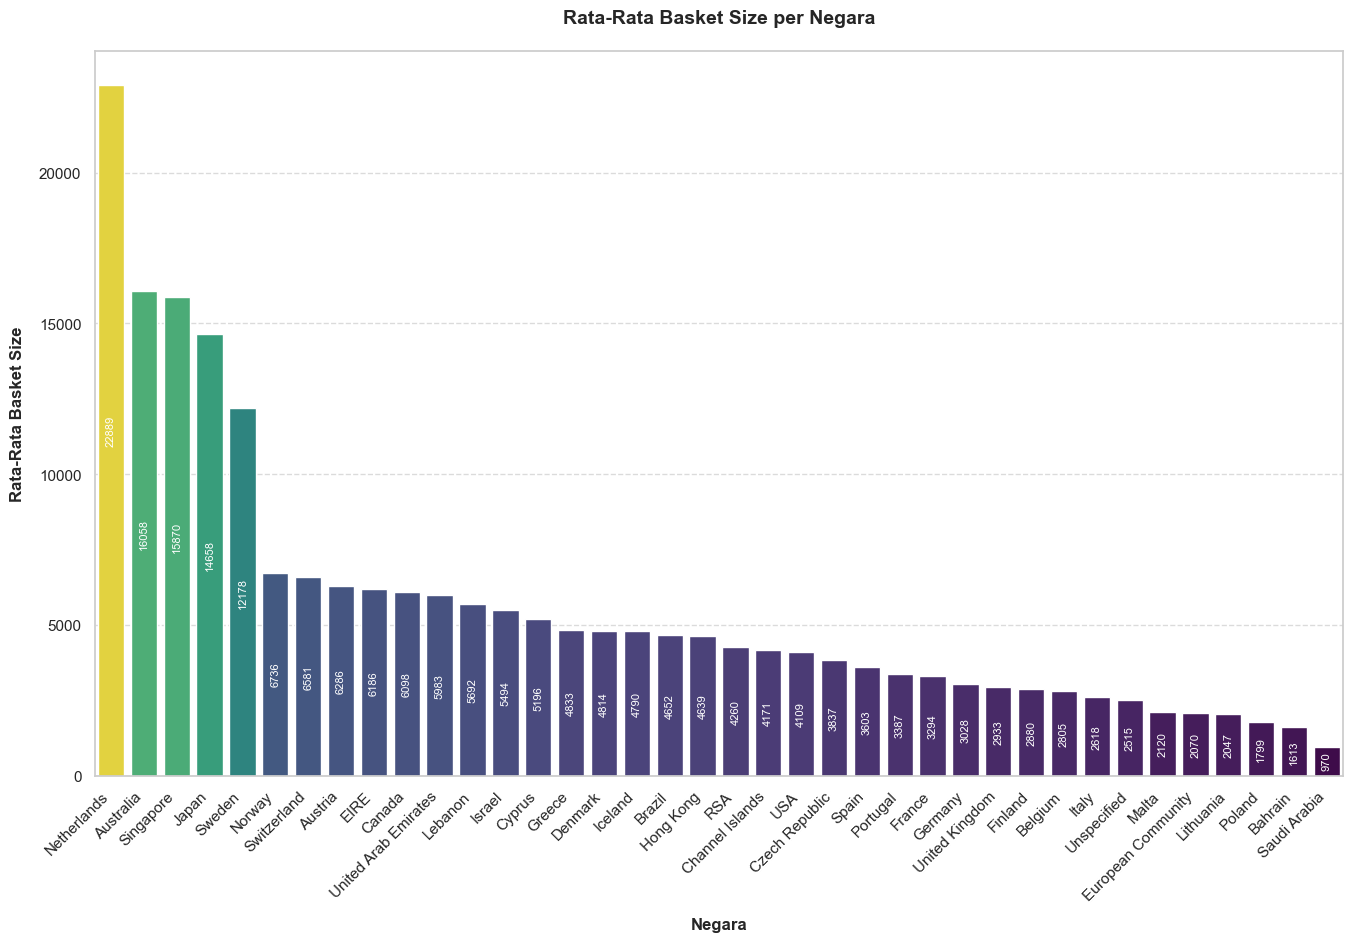

In [103]:
# Menghitung basket size per transaksi per negara
country_basket = (
    df_sales
    .groupby(['Country', 'TransactionNo'])['BasketSize']
    .sum()
    .reset_index()
)

# Menghitung rata-rata basket size per negara dan mengurutkannya
avg_basket_size_per_country = (
    country_basket
    .groupby('Country')['BasketSize']
    .mean()
    .reset_index(name='AvgBasketSize')
    .sort_values('AvgBasketSize', ascending=False)  # Urutkan dari besar ke kecil
)

# Visualisasi rata-rata basket size per negara
plt.figure(figsize=(14, 10))  # Ukuran figure lebih besar
ax = sns.barplot(
    data=avg_basket_size_per_country,
    x='Country',
    y='AvgBasketSize',
    hue="AvgBasketSize",
    legend=False,
    palette='viridis',
    order=avg_basket_size_per_country['Country']  # Mengikuti urutan data
)

plt.title('Rata-Rata Basket Size per Negara', pad=20, fontsize=14,fontweight='bold')
plt.xlabel('Negara', labelpad=10,fontweight='bold')
plt.ylabel('Rata-Rata Basket Size', labelpad=10,fontweight='bold')

# Menambahkan angka vertikal di dalam setiap bar
max_height = avg_basket_size_per_country['AvgBasketSize'].max()
for p in ax.patches:
    height = p.get_height()
    # Posisi teks di tengah bar (50% tinggi)
    text_y = height * 0.5
    ax.text(
        p.get_x() + p.get_width() / 2,
        text_y,
        f"{height:.0f}",  
        ha='center',
        va='center',
        fontsize=8,
        color='white',  # Warna teks putih untuk kontras
        rotation=90  # Rotasi vertikal
    )

# Rotasi label x-axis dan penyesuaian layout
plt.xticks(rotation=45, ha='right')  # Rotasi 45 derajat dengan alignment kanan
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid line untuk y-axis

# Atur margin dan spacing
plt.tight_layout(pad=2)  # Padding ekstra
plt.subplots_adjust(bottom=0.2)  # Ruang ekstra di bagian bawah untuk label

plt.show()

# Crucial Question

Ini adalah 5 pertanyaan utama yang ditanyakan oleh pembuat dataset sales ini.  
Anda dapat menggunakan analisis yang sudah dikerjakan pada bagian sebelumnya, ataupun melakukan analisis baru untuk menjawab pertanyaan dibawah.

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

## Monthly Sales Trends

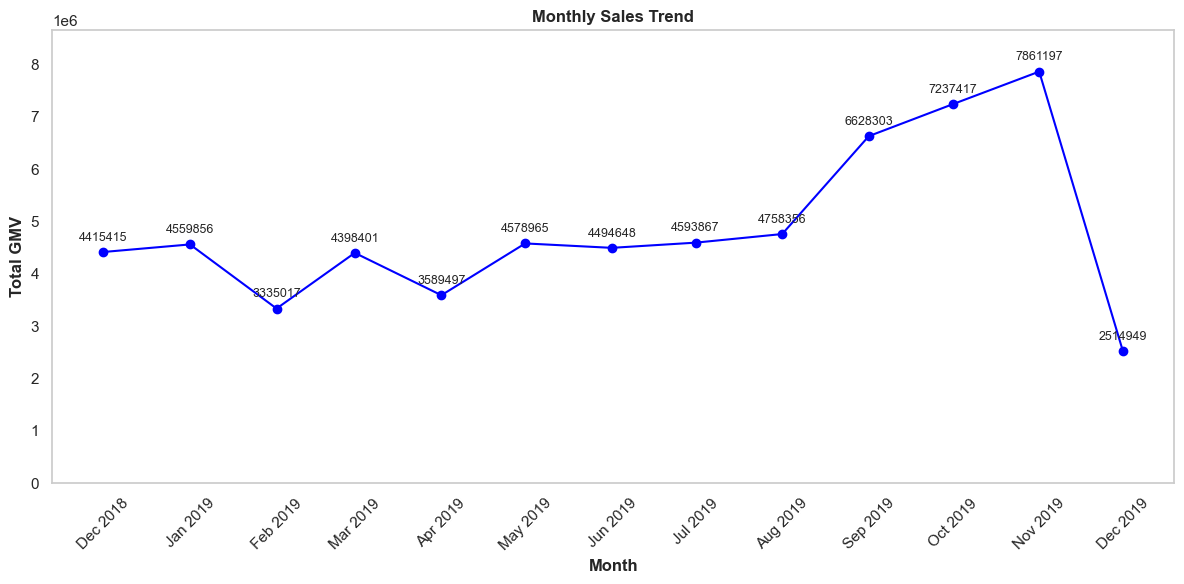

In [105]:
# Menghitung GMV per bulan
monthly_sales = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['BasketSize'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

# Visualisasi Tren Penjualan Bulanan dengan semua bulan ditampilkan di sumbu x
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['BasketSize'], marker='o', color='blue')
plt.title('Monthly Sales Trend', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Total GMV', fontweight='bold')
plt.xticks(monthly_sales['Date'], monthly_sales['Date'].dt.strftime('%b %Y'), rotation=45)
plt.grid(False)
plt.ylim(0, monthly_sales["BasketSize"].max() * 1.1)

# Menambahkan anotasi angka di setiap titik
max_gmv = monthly_sales['BasketSize'].max()
for x, y in zip(monthly_sales['Date'], monthly_sales['BasketSize']):
    plt.text(
        x,
        y + max_gmv * 0.02,
        f"{int(y)}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

## Most Frequently Purchased Products

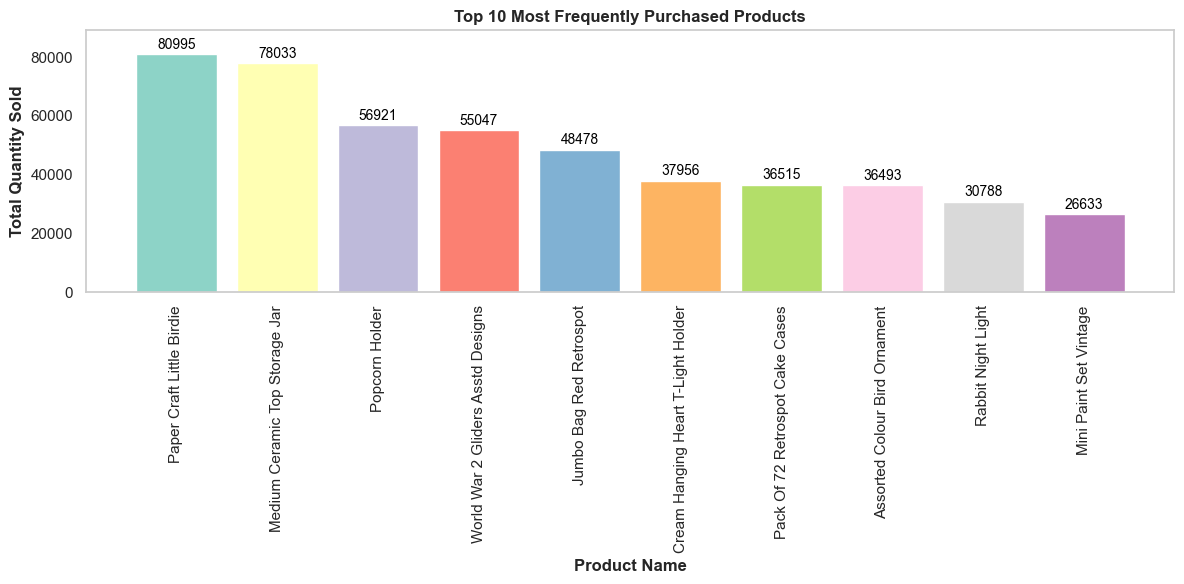

In [107]:
# Menghitung produk yang paling sering dibeli
product_count = (
    df_sales
    .groupby('ProductName')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
    .head(10)
)

# Siapkan palette warna dari Seaborn
palette = sns.color_palette("Set3", n_colors=len(product_count))

# Visualisasi Produk Terpopuler dengan warna-warni dan angka di setiap bar
plt.figure(figsize=(12, 6))
bars = plt.bar(
    product_count['ProductName'],
    product_count['Quantity'],
    color=palette
)
plt.title('Top 10 Most Frequently Purchased Products', fontweight='bold')
plt.xlabel('Product Name', fontweight='bold')
plt.ylabel('Total Quantity Sold', fontweight='bold')
plt.xticks(rotation=90)
plt.ylim(0, product_count["Quantity"].max() * 1.1)
plt.grid(False)

# Tambahkan angka di setiap bar
max_qty = product_count['Quantity'].max()
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + max_qty * 0.01,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

## Products Purchased per Transaction

Data Jumlah Produk yang Dibeli per Transaksi per Customer:
   CustomerNo TransactionNo  TotalProducts
0     12004.0        551004            104
1     12006.0        552006              2
2     12008.0        546008            421
3     12013.0        539013              3
4     12024.0        557024             14

Rata-rata jumlah produk yang dibeli per transaksi per customer: 282.56


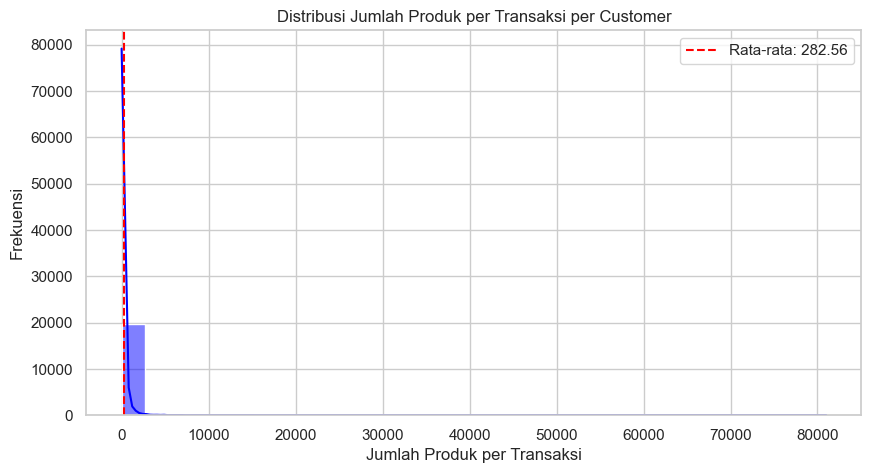

In [109]:
# Menghitung jumlah produk yang dibeli per transaksi per customer
customer_transaction_data = df_sales.groupby(['CustomerNo', 'TransactionNo'])['Quantity'].sum().reset_index()
customer_transaction_data.columns = ['CustomerNo', 'TransactionNo', 'TotalProducts']

# Menampilkan data hasil analisis (5 baris pertama)
print("Data Jumlah Produk yang Dibeli per Transaksi per Customer:")
print(customer_transaction_data.head())

# Menghitung rata-rata jumlah produk per transaksi per customer
average_products_per_customer = customer_transaction_data['TotalProducts'].mean()
print(f"\nRata-rata jumlah produk yang dibeli per transaksi per customer: {average_products_per_customer:.2f}")

# Visualisasi Histogram
plt.figure(figsize=(10, 5))
sns.histplot(customer_transaction_data['TotalProducts'], bins=30, kde=True, color='blue')
plt.axvline(average_products_per_customer, color='red', linestyle='dashed', label=f'Rata-rata: {average_products_per_customer:.2f}')
plt.title('Distribusi Jumlah Produk per Transaksi per Customer')
plt.xlabel('Jumlah Produk per Transaksi')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

Analisis Jumlah Produk yang Dibeli per Customer per Transaksi dan Rata-Rata Quantity per Transaksi:
       CustomerNo TransactionNo  ProductNo  Quantity  \
0         12004.0        551004         56       104   
1         12006.0        552006          1         2   
2         12008.0        546008        203       421   
3         12013.0        539013          1         3   
4         12024.0        557024          5        14   
...           ...           ...        ...       ...   
19784     18283.0        579673         52       134   
19785     18283.0        580872         50       142   
19786     18287.0        554065         29       488   
19787     18287.0        570715         38       990   
19788     18287.0        573167          3       108   

       AverageQuantityPerTransaction  
0                         104.000000  
1                           2.000000  
2                         421.000000  
3                           3.000000  
4                          14.00

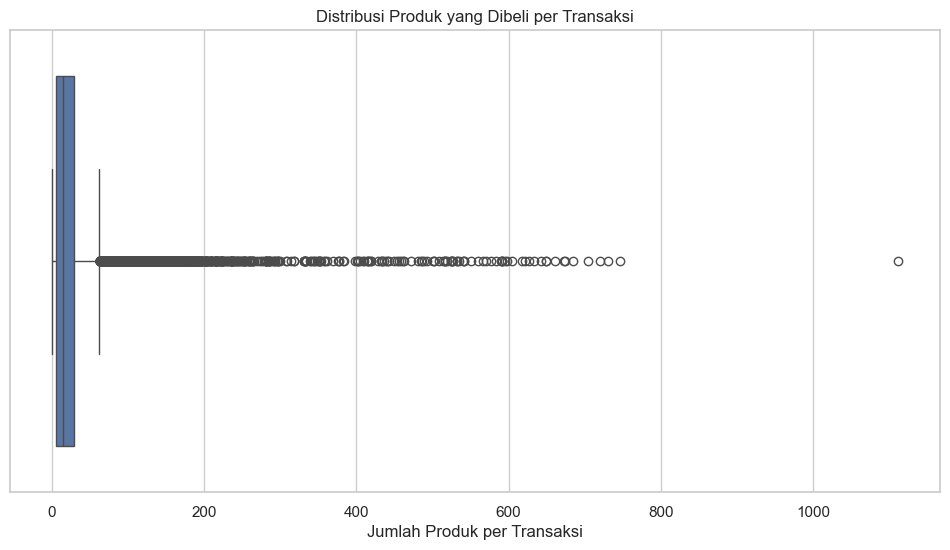

In [111]:
# Menghitung jumlah produk yang dibeli per customer per transaksi
df_products_per_transaction = df_sales.groupby(['CustomerNo', 'TransactionNo']).agg({
    'ProductNo': 'count',  # Menghitung jumlah produk yang dibeli per transaksi
    'Quantity': 'sum'  # Menghitung total kuantitas produk per transaksi
}).reset_index()

# Menghitung rata-rata quantity per transaksi per customer
df_avg_quantity_per_transaction = df_products_per_transaction.groupby('CustomerNo').agg({
    'Quantity': 'mean'
}).reset_index().rename(columns={'Quantity': 'AverageQuantityPerTransaction'})

# Menggabungkan hasil analisis ke DataFrame utama
df_analysis = pd.merge(df_products_per_transaction, df_avg_quantity_per_transaction, on='CustomerNo', how='left')

# Menampilkan hasil
print("Analisis Jumlah Produk yang Dibeli per Customer per Transaksi dan Rata-Rata Quantity per Transaksi:")
print(df_analysis)

# Visualisasi Box Plot: Distribusi Produk yang Dibeli per Transaksi
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_products_per_transaction, x='ProductNo')
plt.title('Distribusi Produk yang Dibeli per Transaksi')
plt.xlabel('Jumlah Produk per Transaksi')
plt.show()

## Customer Rule-Based Segmentation

Segment
Medium    2306
High      2037
Low        195
VIP        180
Name: count, dtype: int64


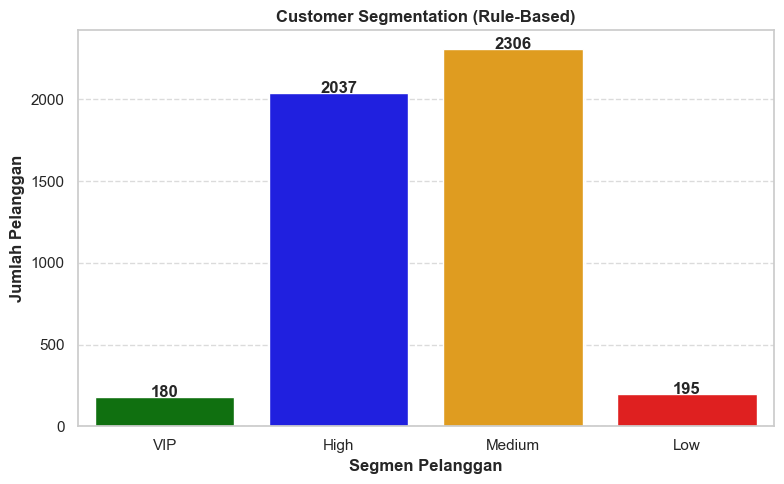

In [113]:
# Pastikan kolom tanggal
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Tanggal acuan untuk Recency
snapshot_date = df_sales['Date'].max() + pd.Timedelta(days=1)

# Hitung variabel agregat
df_cluster = df_sales.groupby('CustomerNo').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,      # Recency
    'TransactionNo': 'nunique',                             # Frequency
    'TotalRevenue': 'sum',                                  # Revenue
    'BasketSize': 'mean'                                    # Avg Basket
}).reset_index()

# Rename kolom
df_cluster.columns = ['CustomerNo', 'Recency', 'Frequency', 'Revenue', 'BasketSize']

# Hitung kuartil
q = df_cluster[['Recency', 'Frequency', 'Revenue', 'BasketSize']].quantile([0.25, 0.5, 0.75])
q1 = q.loc[0.25]
q3 = q.loc[0.75]

# Fungsi Segmentasi Rule-Based
def assign_segment(row):
    if (
        row['Revenue'] >= q3['Revenue'] and
        row['BasketSize'] >= q3['BasketSize'] and
        row['Frequency'] >= q3['Frequency'] and
        row['Recency'] <= q1['Recency']
    ):
        return 'VIP'
    elif (
        row['Revenue'] >= q3['Revenue'] or
        row['BasketSize'] >= q3['BasketSize'] or
        row['Frequency'] >= q3['Frequency']
    ):
        return 'High'
    elif (
        row['Revenue'] <= q1['Revenue'] and
        row['BasketSize'] <= q1['BasketSize'] and
        row['Frequency'] <= q1['Frequency'] and
        row['Recency'] >= q3['Recency']
    ):
        return 'Low'
    else:
        return 'Medium'

# Terapkan segmentasi
df_cluster['Segment'] = df_cluster.apply(assign_segment, axis=1)

# Tampilkan distribusi
print(df_cluster['Segment'].value_counts())

# Visualisasi jumlah pelanggan per segmen
# Visualisasi jumlah pelanggan per segmen
plt.figure(figsize=(8, 5))
color_map = {'Low': 'red', 'Medium': 'orange', 'High': 'blue', 'VIP': 'green'}
sns.countplot(data=df_cluster, x='Segment', hue='Segment', order=['VIP', 'High', 'Medium', 'Low'], palette=color_map, legend=False)
plt.title('Customer Segmentation (Rule-Based)', fontweight='bold')
plt.xlabel('Segmen Pelanggan', fontweight='bold')
plt.ylabel('Jumlah Pelanggan', fontweight='bold')

# Tambahkan label jumlah pada setiap bar
segment_counts = df_cluster['Segment'].value_counts()
for index, value in enumerate(segment_counts.loc[['VIP', 'High', 'Medium', 'Low']]):
    plt.text(index, value + 1, str(value), ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Customer Segmentation: Revenue vs BasketSize

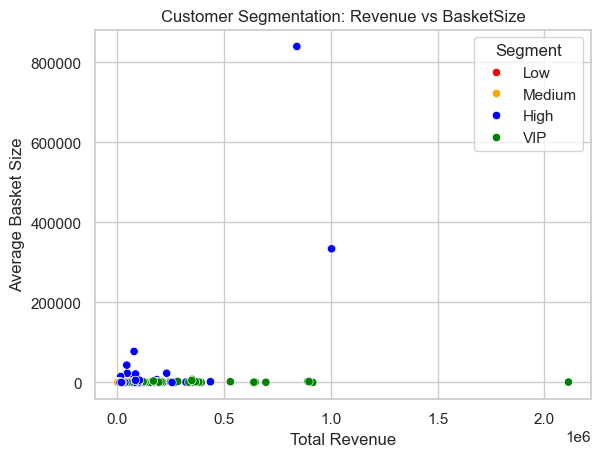

In [115]:
# Visualisasi Customer Segmentation: Revenue vs BasketSize

color_map = {'Low': 'red', 'Medium': 'orange', 'High': 'blue', 'VIP': 'green'}
sns.scatterplot(data=df_cluster, x='Revenue', y='BasketSize', hue='Segment', palette=color_map)
plt.title('Customer Segmentation: Revenue vs BasketSize')
plt.xlabel('Total Revenue')
plt.ylabel('Average Basket Size')
plt.grid(True)
plt.show()

### Customer Segmentation: Revenue vs Frequency

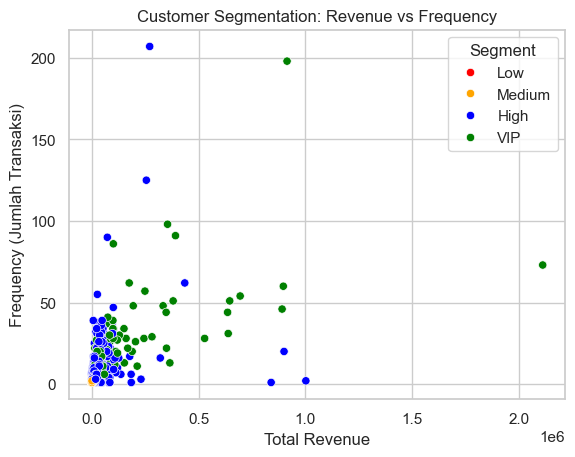

In [117]:
# Visualisasi Customer Segmentation: Revenue vs Frequency

color_map = {'Low': 'red', 'Medium': 'orange', 'High': 'blue', 'VIP': 'green'}
sns.scatterplot(data=df_cluster, x='Revenue', y='Frequency', hue='Segment', palette=color_map)
plt.title('Customer Segmentation: Revenue vs Frequency')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency (Jumlah Transaksi)')
plt.grid(True)
plt.show()

### Customer Segmentation: Revenue vs Recency

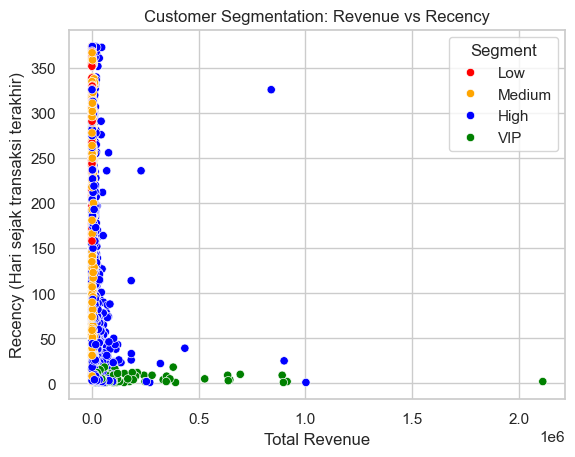

In [119]:
# Visualisasi Customer Segmentation: Revenue vs Recency

color_map = {'Low': 'red', 'Medium': 'orange', 'High': 'blue', 'VIP': 'green'}
sns.scatterplot(data=df_cluster, x='Revenue', y='Recency', hue='Segment', palette=color_map)
plt.title('Customer Segmentation: Revenue vs Recency')
plt.xlabel('Total Revenue')
plt.ylabel('Recency (Hari sejak transaksi terakhir)')
plt.grid(True)
plt.show()

### Customer Segmentation: Frequency vs Recency

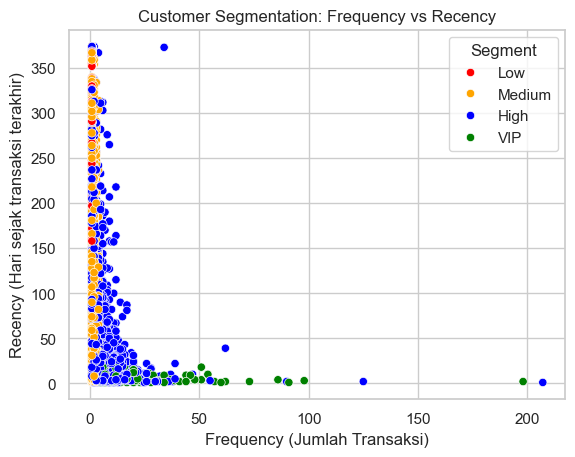

In [121]:
# Visualisasi Customer Segmentation: Frequency vs Recency

color_map = {'Low': 'red', 'Medium': 'orange', 'High': 'blue', 'VIP': 'green'}
sns.scatterplot(data=df_cluster, x='Frequency', y='Recency', hue='Segment', palette=color_map)
plt.title('Customer Segmentation: Frequency vs Recency')
plt.xlabel('Frequency (Jumlah Transaksi)')
plt.ylabel('Recency (Hari sejak transaksi terakhir)')
plt.grid(True)
plt.show()

## Customer Segmentation using RFM Analysis

1. Champions:                   R=5, F=5, M=5
2. Loyal Customers:             R=4-5, F=4-5, M=4-5
3. Potential Loyalists:         R=4-5, F=3-4, M=3-4
4. New Customers:               R=5, F=1, M=1-3
5. Promising:                   R=4, F=1, M=1-3
6. Customers Needing Attention: R=3, F=3, M=3
7. At Risk:                     R=1-2, F=4-5, M=4-5
8. Can't Lose Them:             R=1, F=5, M=5
9. Lost:                        R=1, F=1, M=1
10. Others:                     Catch-all if no rule matched

Segment
Need Attention                 1395
Loyal Customers                 881
Lost                            797
Champions                       465
Potential Loyalists             417
Customers Needing Attention     282
Promising                       223
At Risk                         141
New Customers                   117
Name: count, dtype: int64


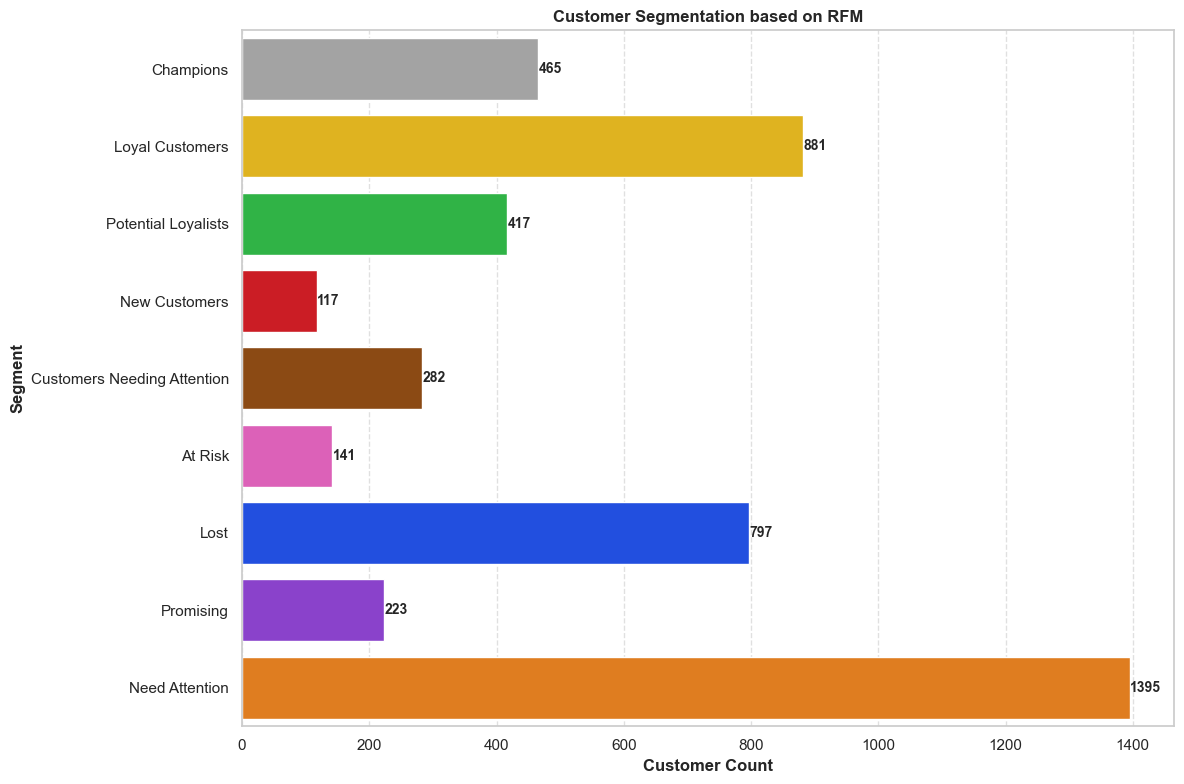

In [186]:
# Pastikan kolom Date bertipe datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Snapshot date untuk menghitung recency
snapshot_date = df_sales['Date'].max() + pd.Timedelta(days=1)

# Hitung RFM metrics
rfm = df_sales.groupby('CustomerNo').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,   # Recency
    'TransactionNo': 'nunique',                         # Frequency
    'TotalRevenue': 'sum'                               # Monetary
}).reset_index()

rfm.columns = ['CustomerNo', 'Recency', 'Frequency', 'Monetary']

# Hitung kuartil untuk setiap dimensi
r_quartiles = rfm['Recency'].quantile([0.25, 0.5, 0.75])
f_quartiles = rfm['Frequency'].quantile([0.25, 0.5, 0.75])
m_quartiles = rfm['Monetary'].quantile([0.25, 0.5, 0.75])

# Fungsi scoring
def r_score(x):
    if x <= r_quartiles[0.25]: return 4
    elif x <= r_quartiles[0.5]: return 3
    elif x <= r_quartiles[0.75]: return 2
    else: return 1

def fm_score(x, quartiles):
    if x <= quartiles[0.25]: return 1
    elif x <= quartiles[0.5]: return 2
    elif x <= quartiles[0.75]: return 3
    else: return 4

# Skoring
rfm['R_Score'] = rfm['Recency'].apply(r_score)
rfm['F_Score'] = rfm['Frequency'].apply(lambda x: fm_score(x, f_quartiles))
rfm['M_Score'] = rfm['Monetary'].apply(lambda x: fm_score(x, m_quartiles))

# Gabungkan skor
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segmentasi berdasarkan kombinasi
def segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r == 4 and f == 4 and m == 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r >= 3 and f == 2:
        return 'Potential Loyalists'
    elif r == 4 and f == 1:
        return 'New Customers'
    elif r == 2 and f == 2:
        return 'Customers Needing Attention'
    elif r == 1 and f >= 3:
        return 'At Risk'
    elif r == 1 and f == 1:
        return 'Lost'
    elif r == 3 and f == 1 and m <= 2:
        return 'Promising'
    else:
        return 'Need Attention'

rfm['Segment'] = rfm.apply(segment, axis=1)

# Tampilkan ringkasan
print(rfm['Segment'].value_counts())

# --- Visualisasi ---
plt.figure(figsize=(12,8))
order = [
    'Champions', 'Loyal Customers', 'Potential Loyalists', 'New Customers',
    'Customers Needing Attention', 'At Risk', 'Lost', 'Promising', 'Need Attention'
]

# Plot horizontal bar chart
ax = sns.countplot(data=rfm, y='Segment', order=order, hue='Segment', palette='bright', legend=False)

# Tambahkan anotasi (jumlah pelanggan) di setiap batang
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        ax.text(width + 1,            # posisi x (di luar bar)
                bar.get_y() + bar.get_height() / 2,  # posisi y (tengah bar)
                int(width),           # teks (jumlah pelanggan)
                va='center',
                fontsize=10,
                fontweight='bold')

# Visualisasi
plt.title('Customer Segmentation based on RFM', fontweight='bold')
plt.xlabel('Customer Count', fontweight='bold')
plt.ylabel('Segment', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

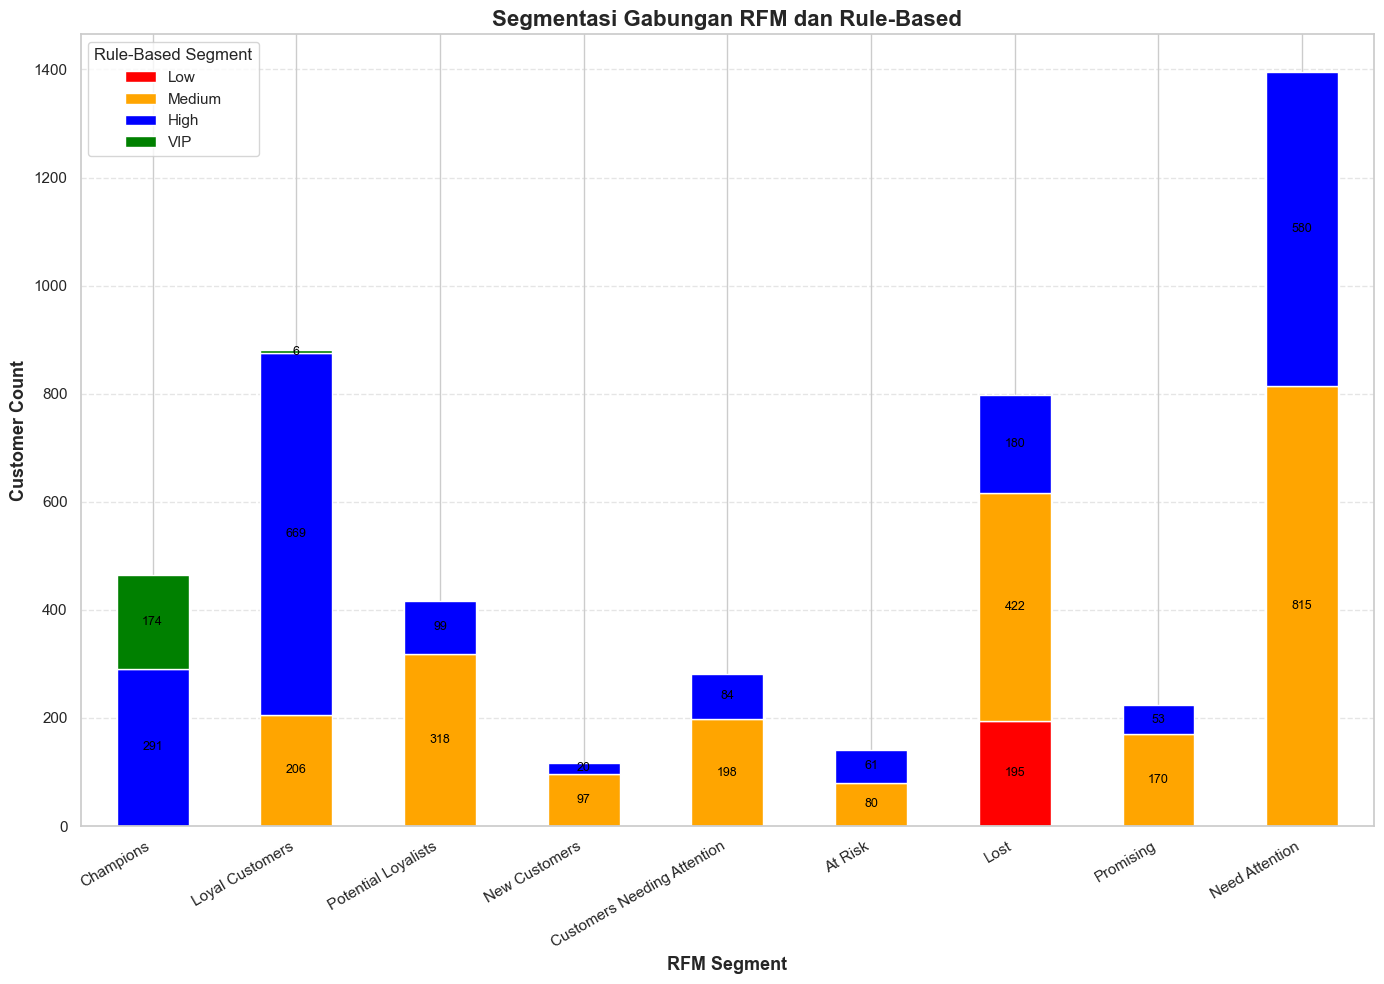

In [176]:
# Ubah nama kolom 'Segment' menjadi 'RuleBased_Segment'
df_rule_based = df_cluster.rename(columns={'Segment': 'RuleBased_Segment'})

# Ubah nama kolom 'Segment' menjadi 'RFM_Segment'
df_rfm = rfm.rename(columns={'Segment': 'RFM_Segment'})
# Jika belum diganti nama kolomnya:
df_combined = pd.merge(df_rfm, df_rule_based, on='CustomerNo', how='inner')
df_combined.rename(columns={'Segment': 'RuleBased_Segment'}, inplace=True)

# Buat crosstab
df_plot = pd.crosstab(df_combined['RFM_Segment'], df_combined['RuleBased_Segment'])

# Urutkan segmen RFM (opsional)
rfm_order = [
    'Champions', 'Loyal Customers', 'Potential Loyalists', 'New Customers',
    'Customers Needing Attention', 'At Risk', 'Lost', 'Promising', 'Need Attention'
]
df_plot = df_plot.reindex(rfm_order)

# Warna manual
colors = {
    'Low': 'red',
    'Medium': 'orange',
    'High': 'blue',
    'VIP': 'green'
}
df_plot = df_plot[[col for col in colors if col in df_plot.columns]]

# Plotting
ax = df_plot.plot(kind='bar', stacked=True, figsize=(14, 10), color=[colors[c] for c in df_plot.columns])

plt.title('Segmentasi Gabungan RFM dan Rule-Based', fontsize=16, fontweight='bold')
plt.xlabel('RFM Segment', fontsize=13, fontweight='bold')
plt.ylabel('Customer Count', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Rule-Based Segment')

# Tambahkan label di tengah bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Kolom df_rule_based: Index(['CustomerNo', 'Recency', 'Frequency', 'Revenue', 'BasketSize',
       'RuleBased_Segment'],
      dtype='object')
   CustomerNo RFM_Segment RuleBased_Segment
0     12004.0        Lost               Low
1     12006.0        Lost               Low
2     12008.0        Lost            Medium
3     12013.0        Lost            Medium
4     12024.0        Lost               Low


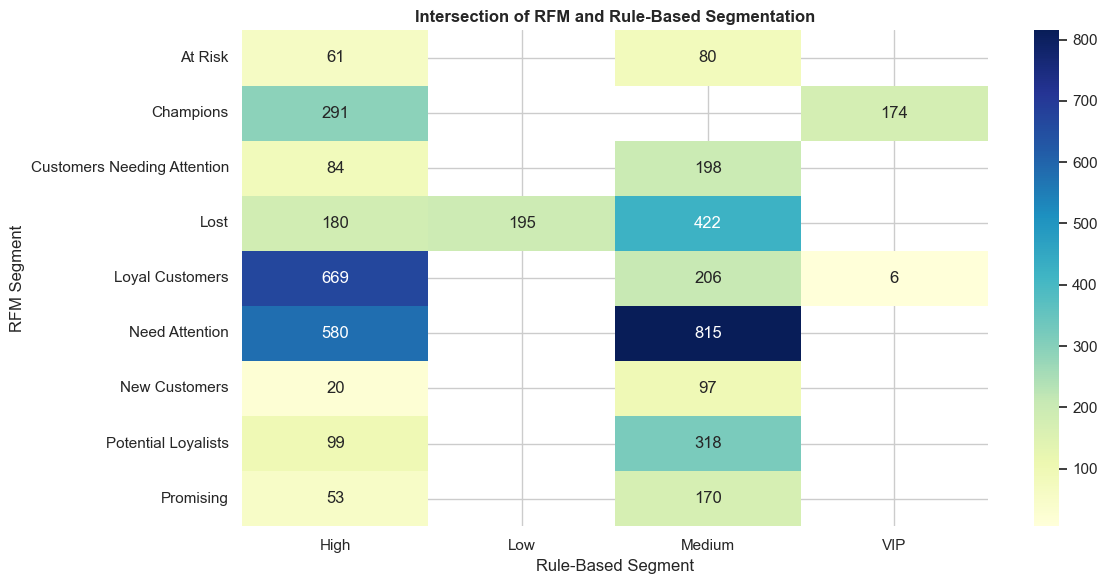

In [160]:
# Lihat kolom yang tersedia di df_rule_based
print("Kolom df_rule_based:", df_rule_based.columns)

# Jika nama kolom segmentasi bukan 'Segment', misalnya 'RuleSegment' atau lainnya,
# ubah baris berikut ini sesuai nama kolom aktualnya
segment_col = 'RuleBased_Segment'  # ganti ini kalau berbeda

# --- Rename dan gabungkan ---
# RFM
df_rfm_renamed = rfm[['CustomerNo', 'Segment']].rename(columns={'Segment': 'RFM_Segment'})

# Rule-based
df_rule_renamed = df_rule_based[['CustomerNo', segment_col]].rename(columns={segment_col: 'RuleBased_Segment'})

# Merge
df_combined = pd.merge(df_rfm_renamed, df_rule_renamed, on='CustomerNo', how='inner')

# Cek hasil
print(df_combined.head())

# Hitung distribusi kombinasi segmen
segment_cross = df_combined.groupby(['RFM_Segment', 'RuleBased_Segment'])['CustomerNo'].count().reset_index()
segment_cross.columns = ['RFM_Segment', 'RuleBased_Segment', 'CustomerCount']

# Pivot table untuk heatmap
pivot_table = segment_cross.pivot(index='RFM_Segment', columns='RuleBased_Segment', values='CustomerCount')

# Visualisasi heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Intersection of RFM and Rule-Based Segmentation', fontweight='bold')
plt.xlabel('Rule-Based Segment')
plt.ylabel('RFM Segment')
plt.tight_layout()
plt.show()